## Importerer nødvendige biblitoker

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import skew, zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Task 1:
## Indlæsning af data
Der indlæses data fra en csv fil.

In [123]:
# Ændrer visningen til at vise alle kolonner for at sikre, at der ikke er nogen, der overses, da datasættet har mange kolonner
pd.set_option('display.max_columns', None)

# Indlæser datasættet
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Tjekker datasættets form (rækker, kolonner)
print("Shape of dataset:", data.shape)

# Får grundlæggende info om datasættet
data.info()

# Viser de første 5 rækker
print(data.head())

# Viser de sidste 5 rækker
print(data.tail())

# Viser en tilfældig prøve på 5 rækker
print(data.sample(5))

Shape of dataset: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 


## Rensning af data
For at forberede dataene til analyse og modellering, skal vi identificere og rydde op i problemer som 
manglende værdier, duplikater, og fejlagtige eller irrelevante data.

In [126]:
# Tjekker for manglende værdier
print("Manglende værdier i hvert column:")
print(data.isnull().sum())  

# Tjekker for NaN-værdier
print("Manglende NaN-værdier i hvert column:")
print(data.isna().sum())  

# Tjekker for duplikater
print(f"Antal duplikatrækker: {data.duplicated().sum()}")  

Manglende værdier i hvert column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsI

Der er ingen manglende eller NaN-værdier i datasættet, hvilket gør dataene klare til videre analyse. Der er heller ingen duplikatrækker, så datasættet er unikt, og der er ikke behov for at fjerne duplikater.

## Udforskning af data
Når dataene er renset, kan der udforskes ved hjælp af deskriptiv statistik og visualiseringer. Dette trin hjælper med at forstå mønstre og relationer mellem funktionerne, især dem, der er relevante.

In [130]:
# Deskriptiv statistik for numeriske kolonner
print("Beskrivende statistik:")
print(data.describe())

Beskrivende statistik:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std       

Den deskriptive statistik giver et hurtigt overblik over de numeriske kolonner, såsom gennemsnit, standardafvigelse, min og max værdi.

Tjekker for outliers ved at plotte histogrammer for hver kolonne.

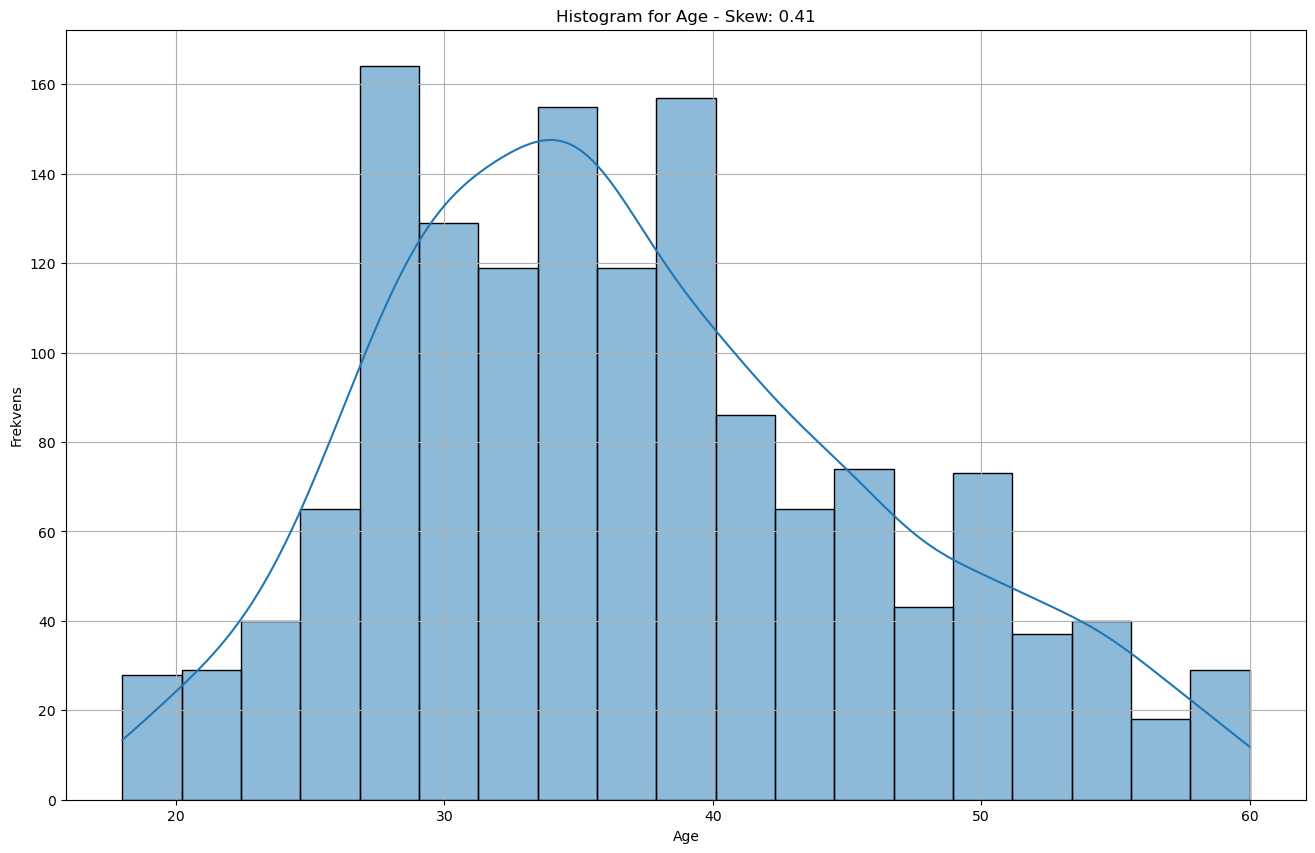

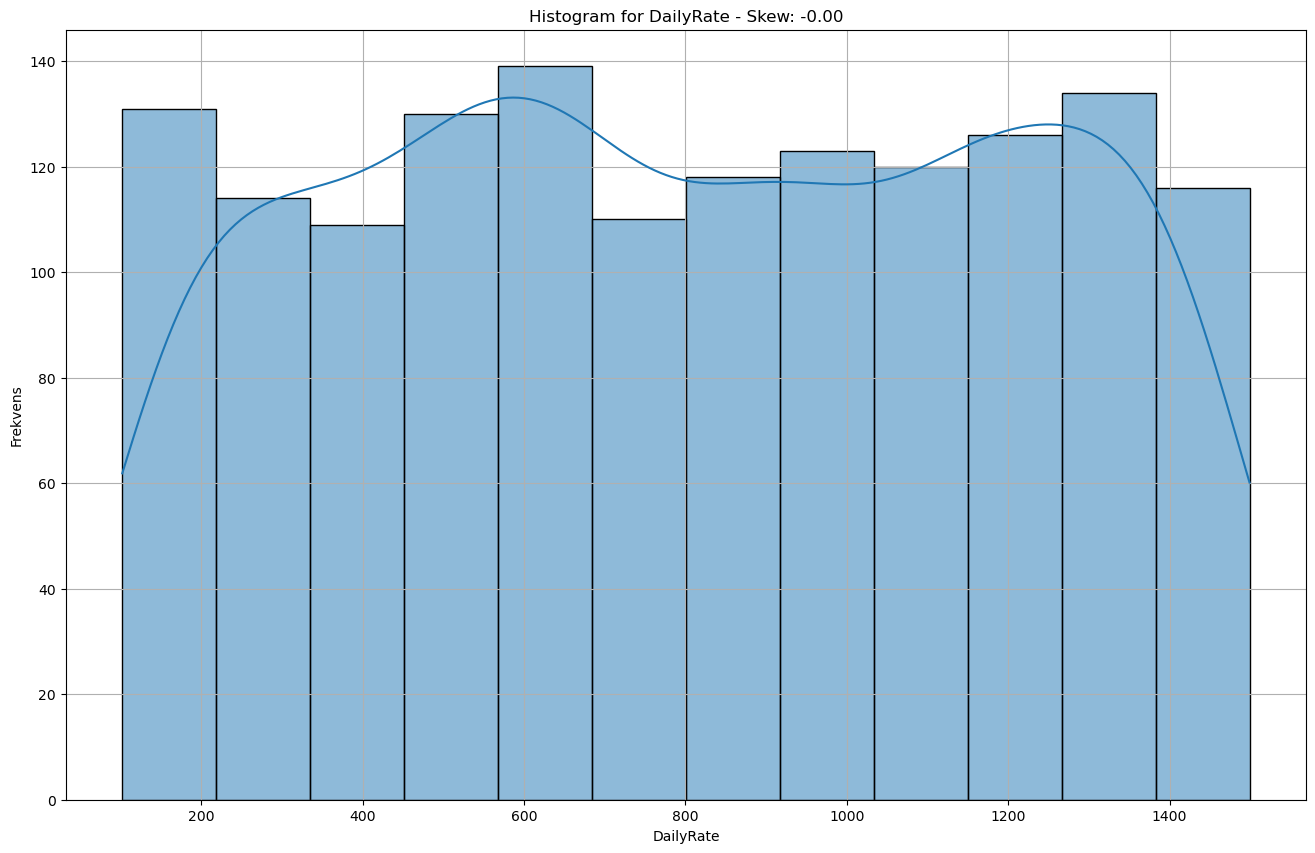

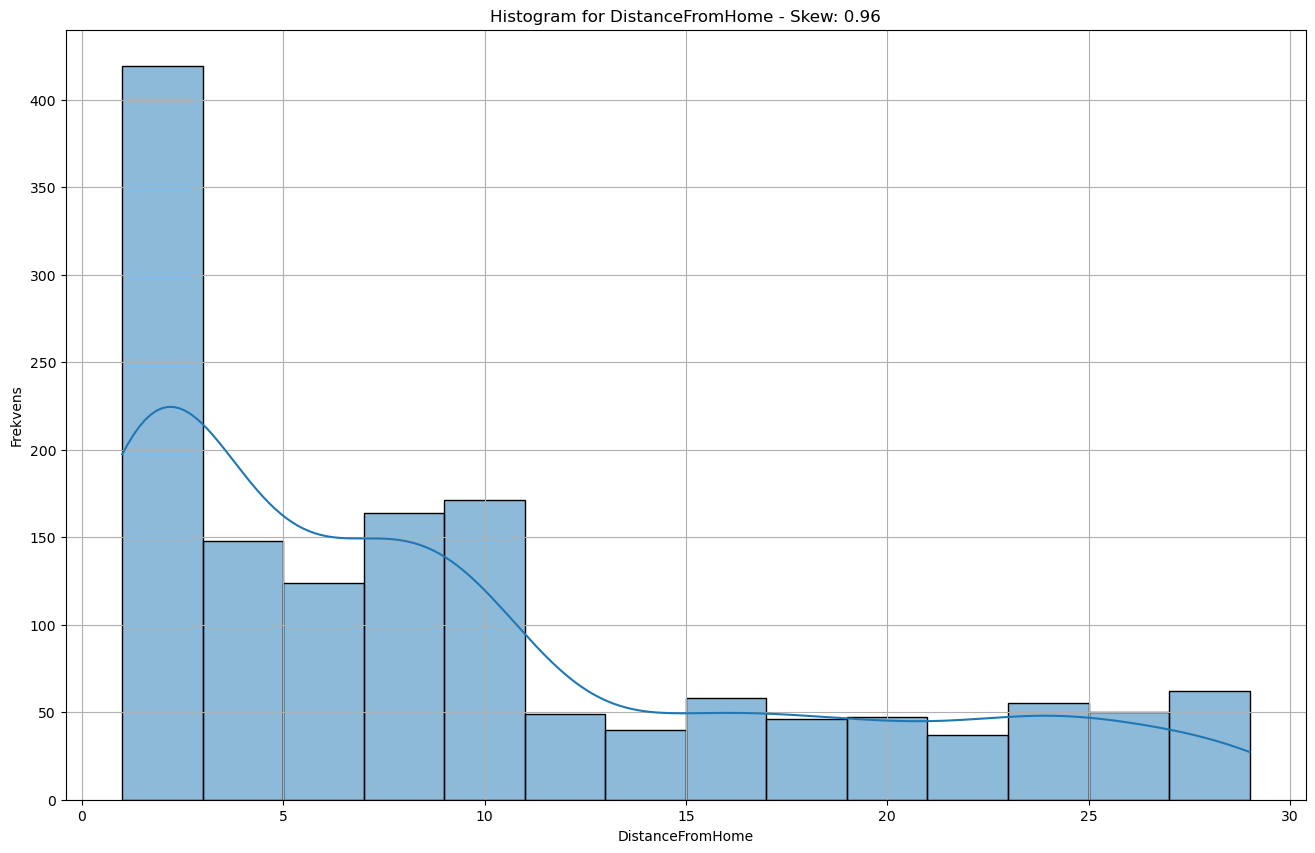

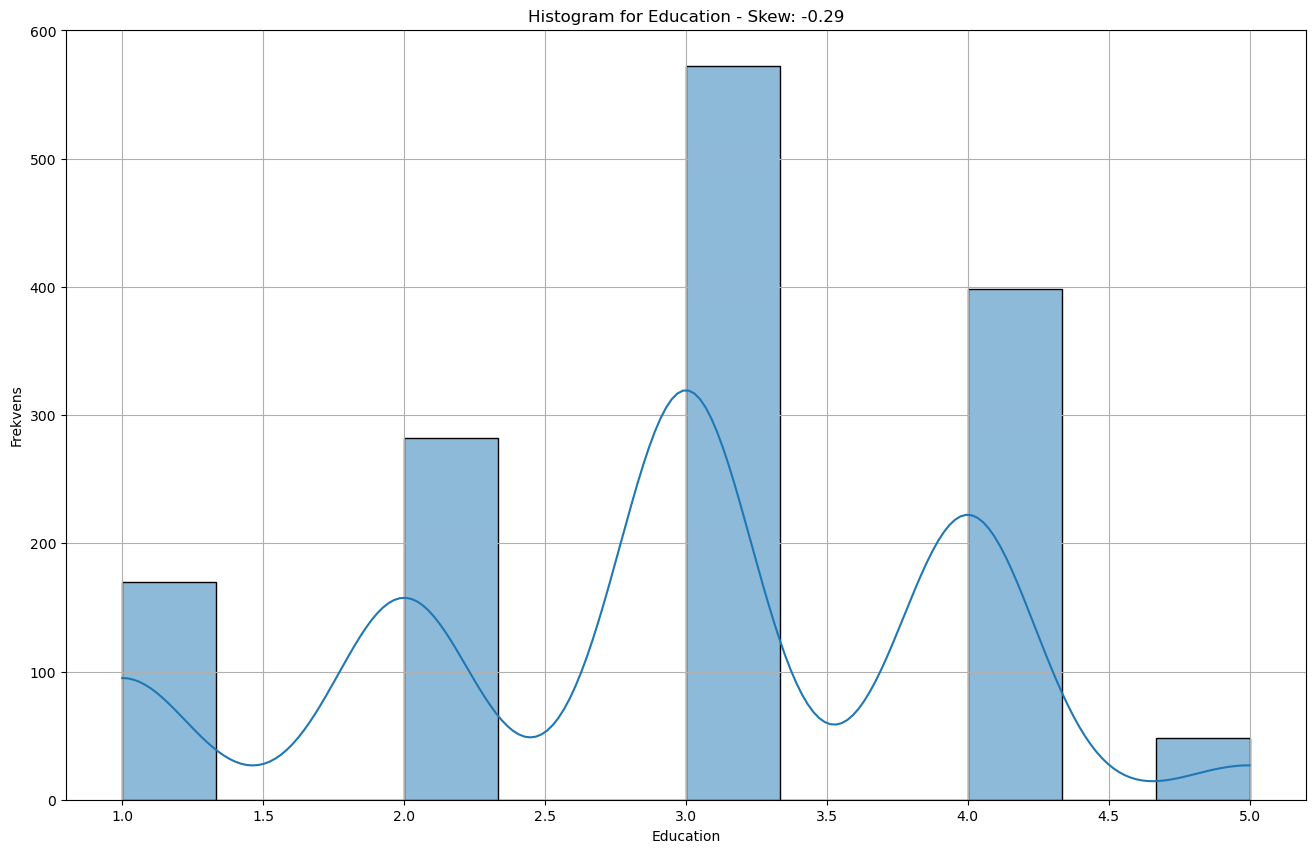

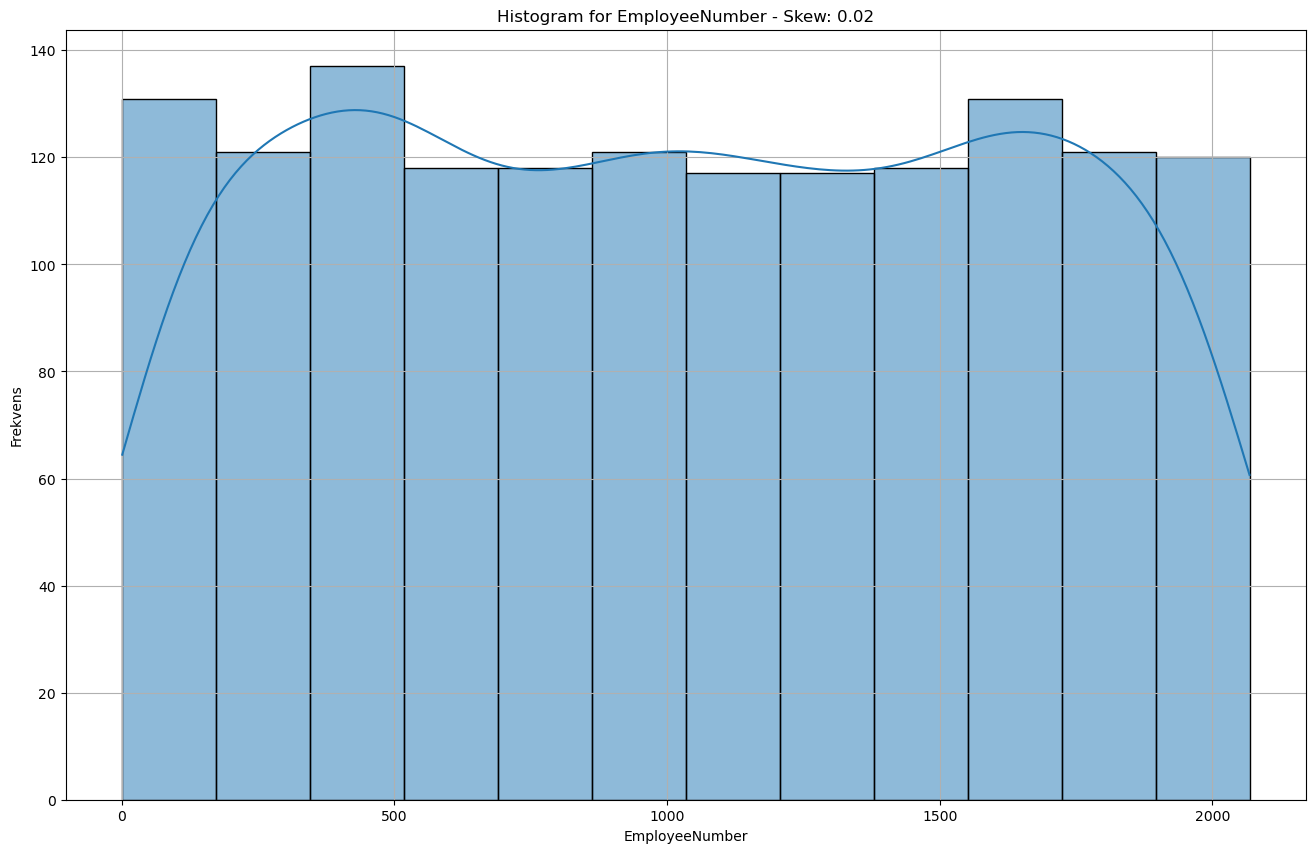

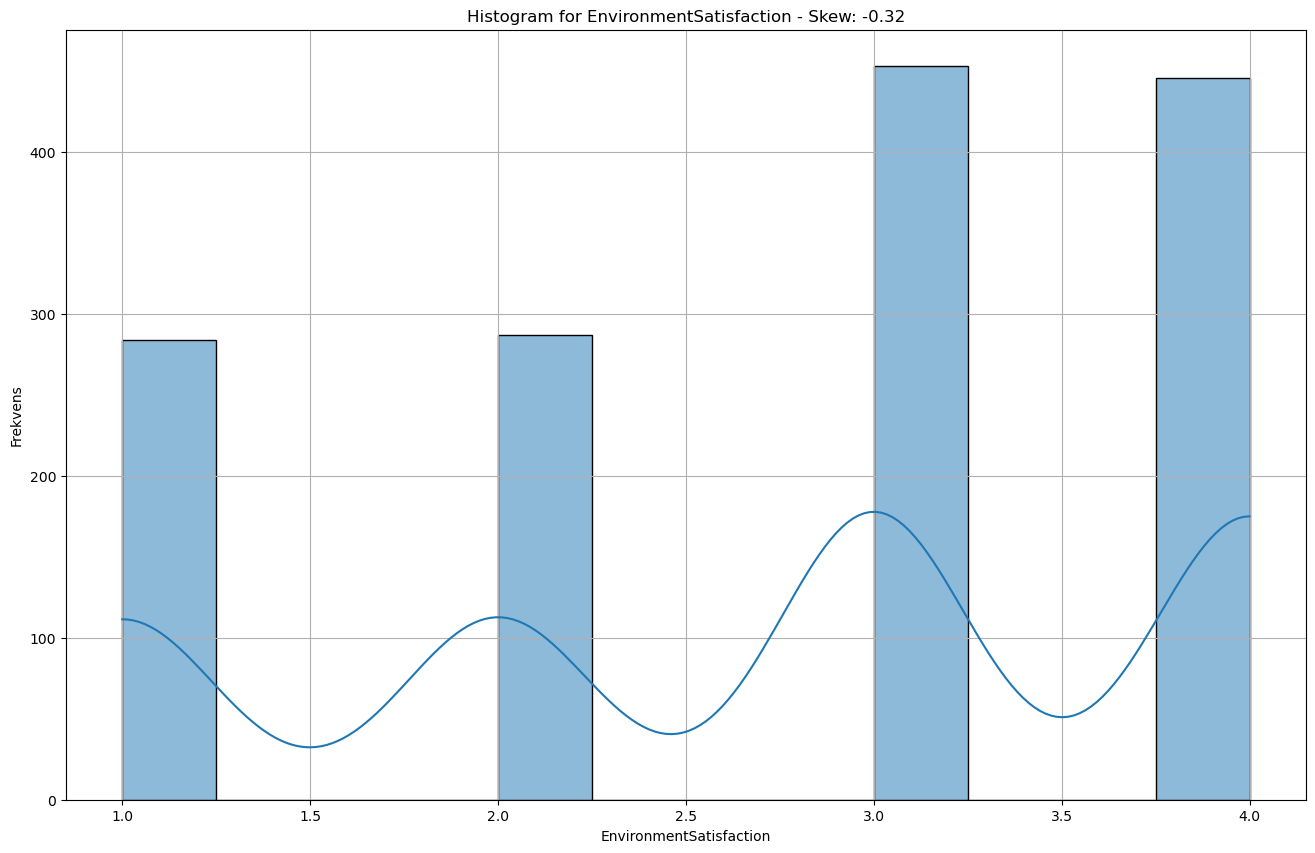

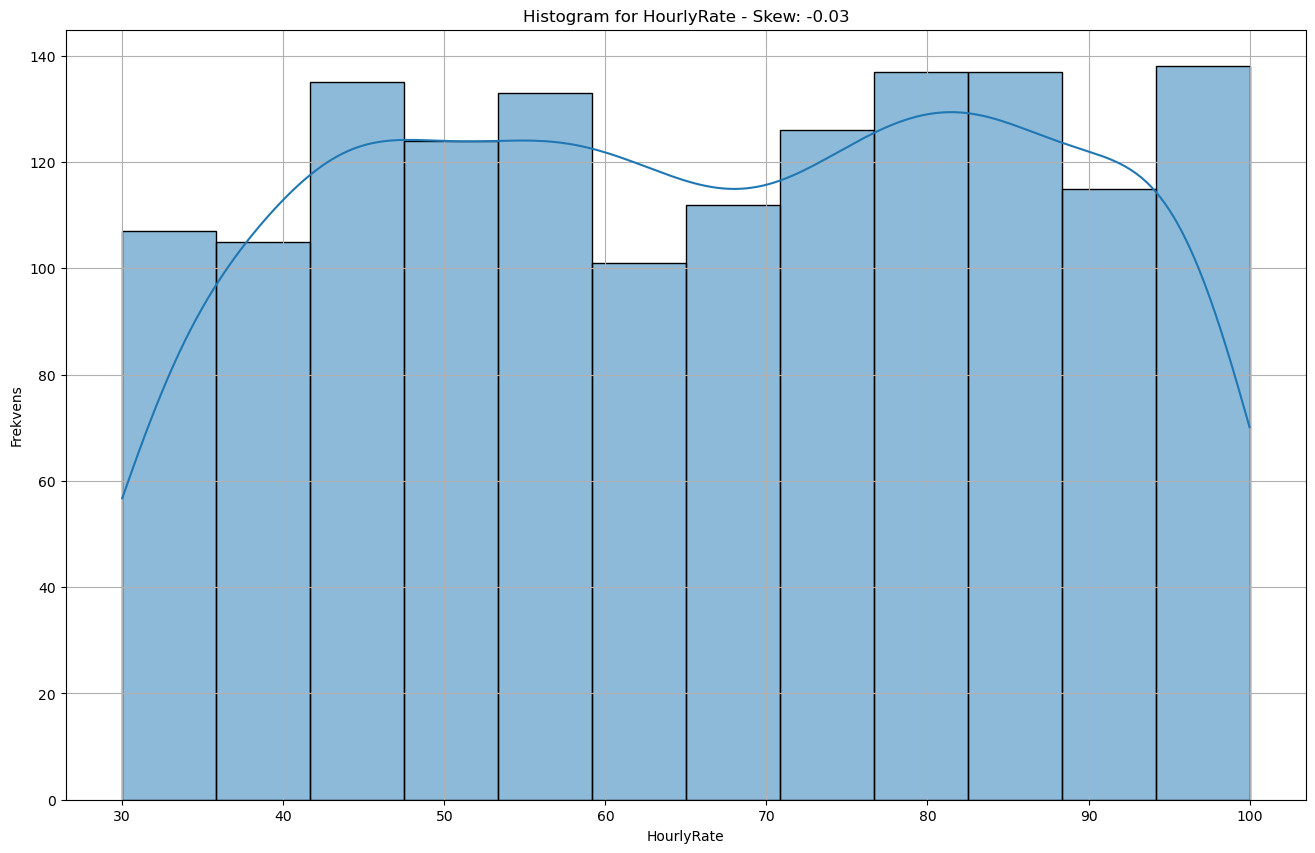

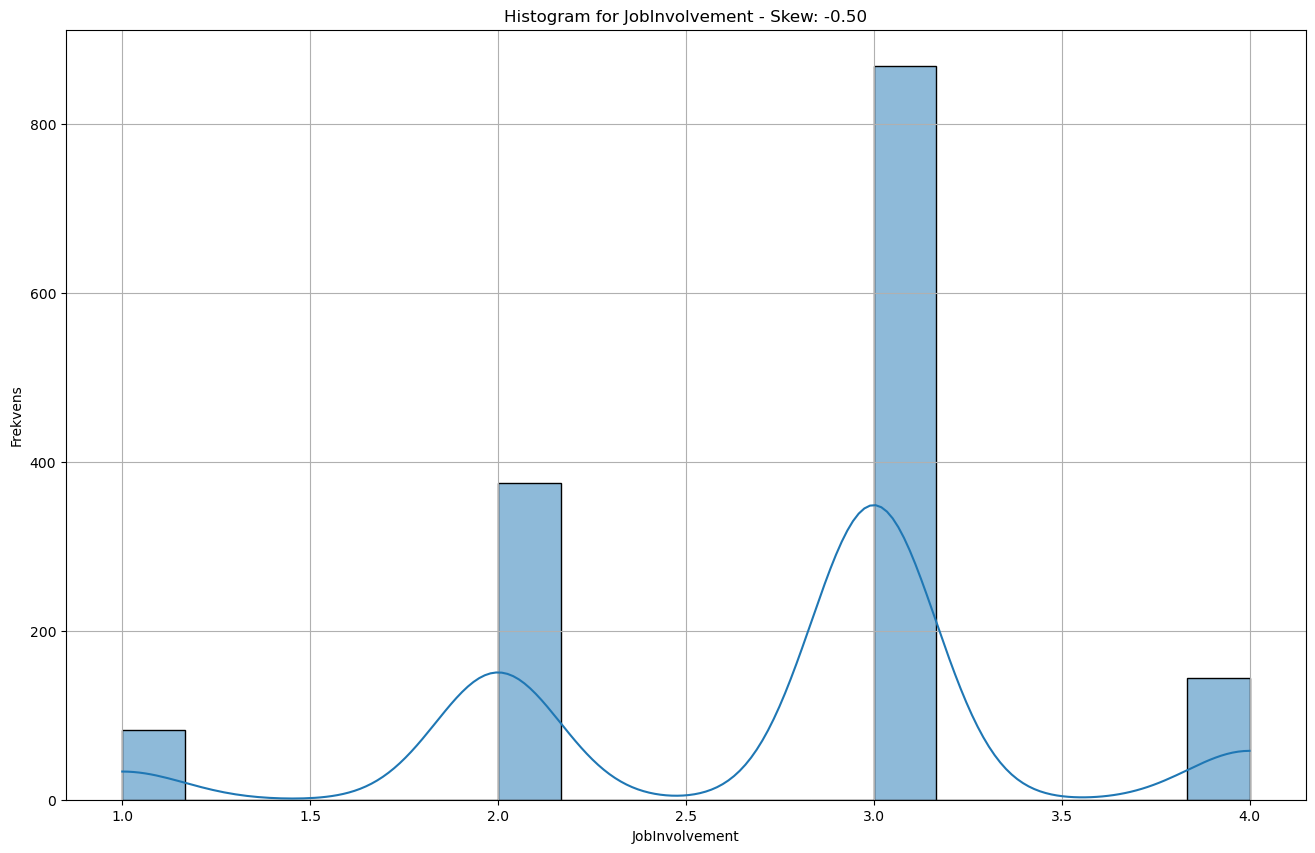

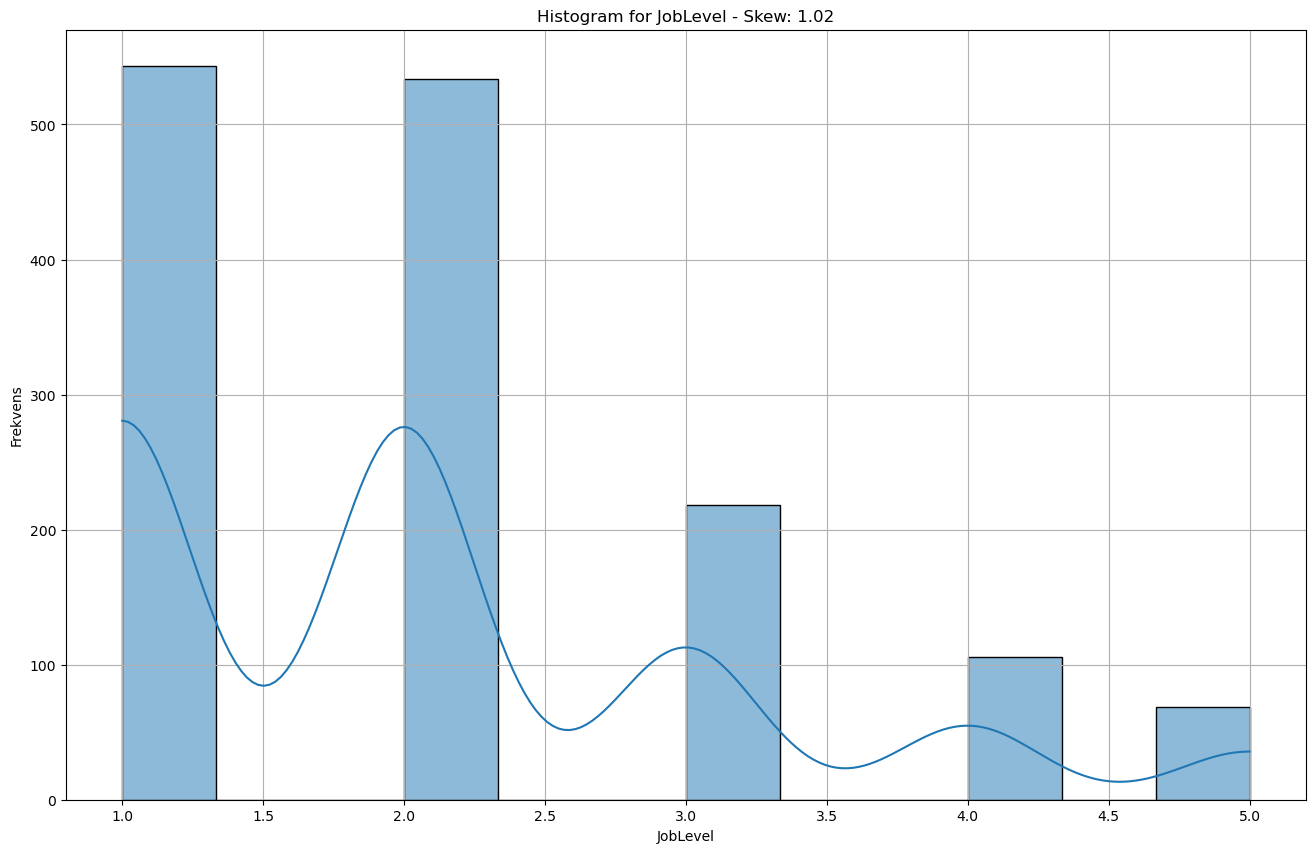

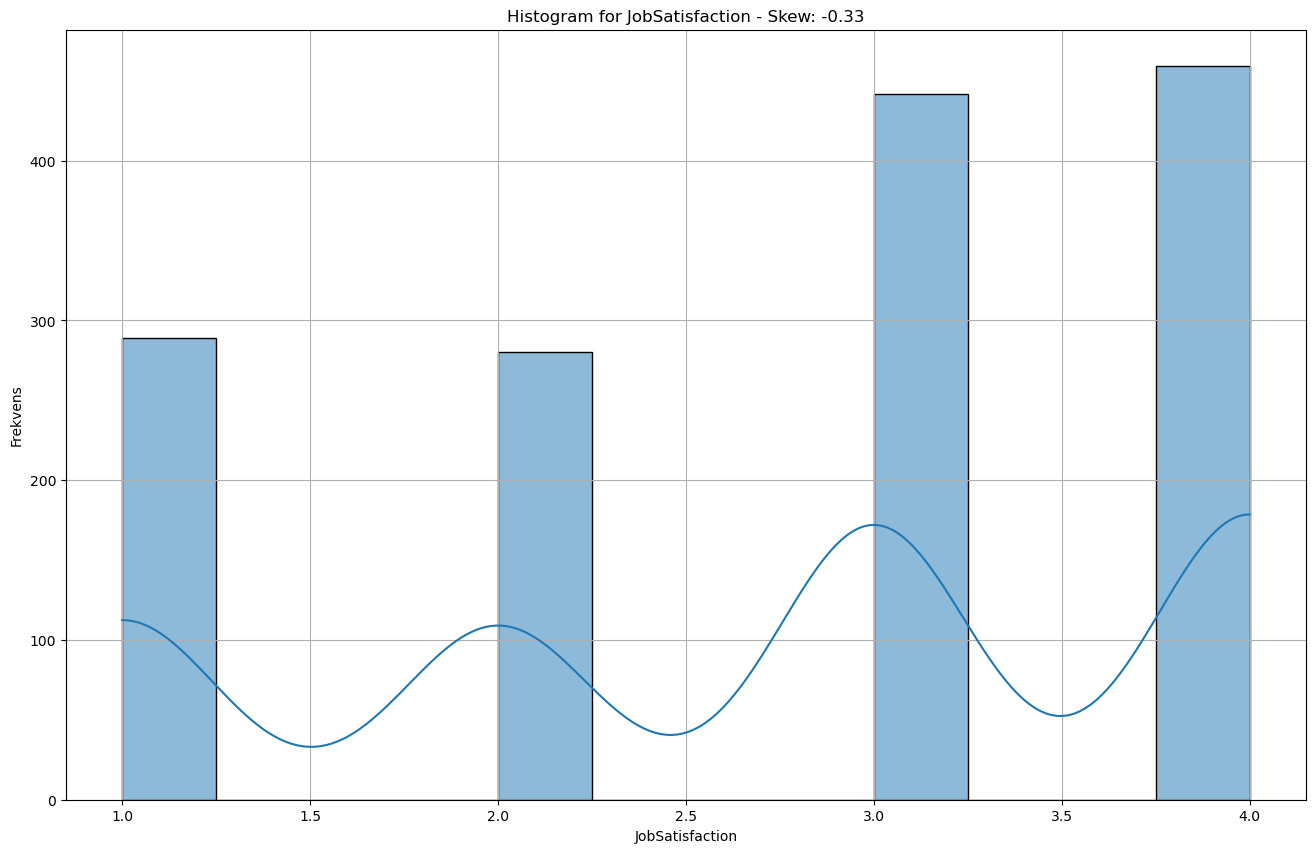

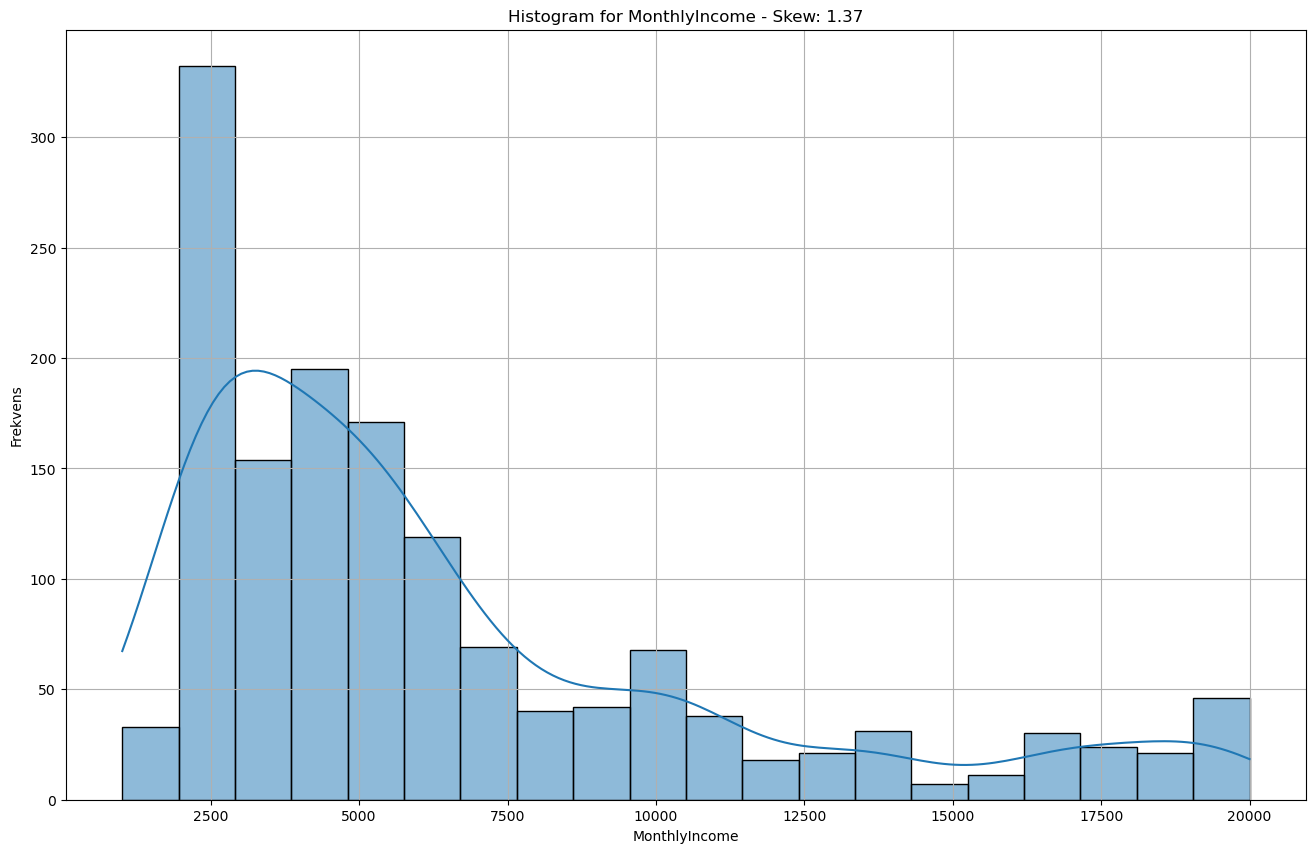

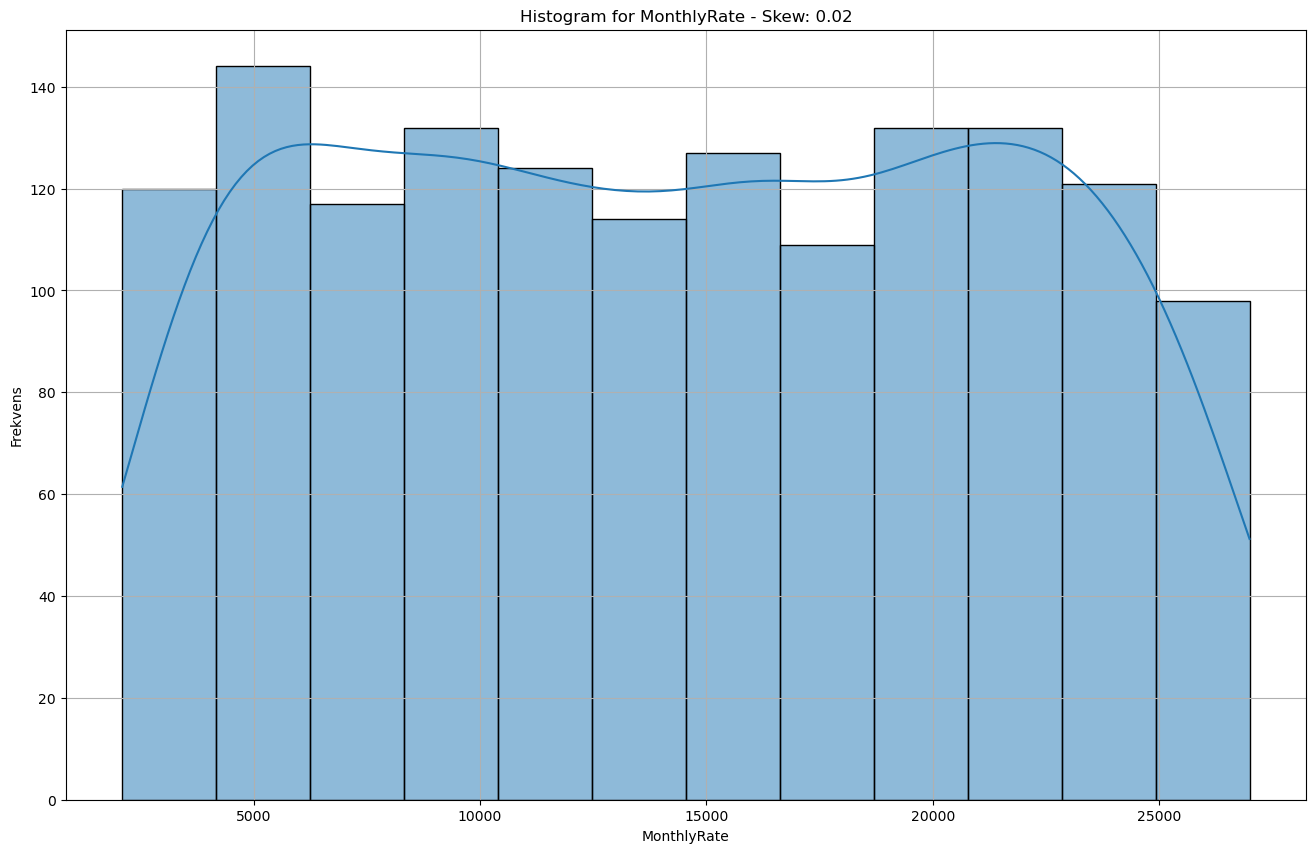

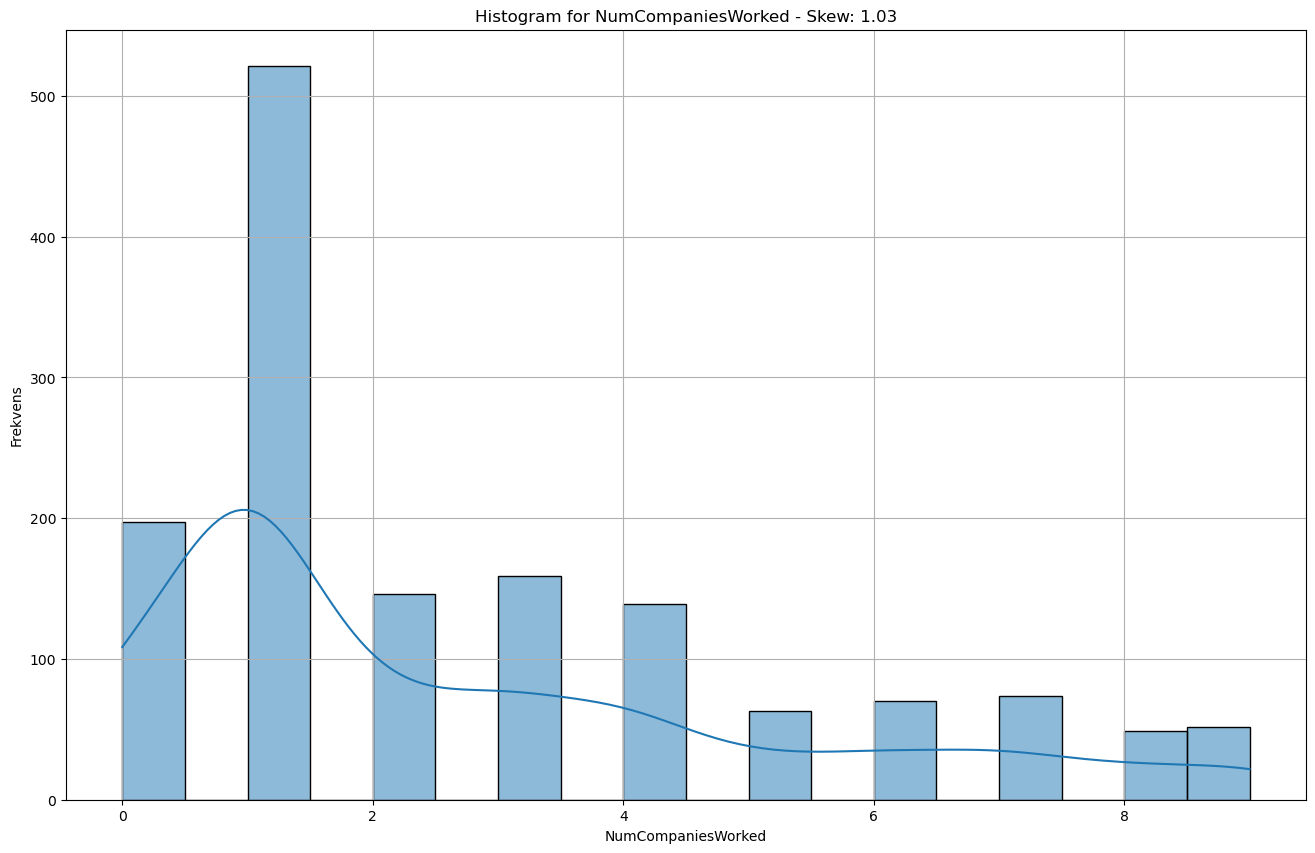

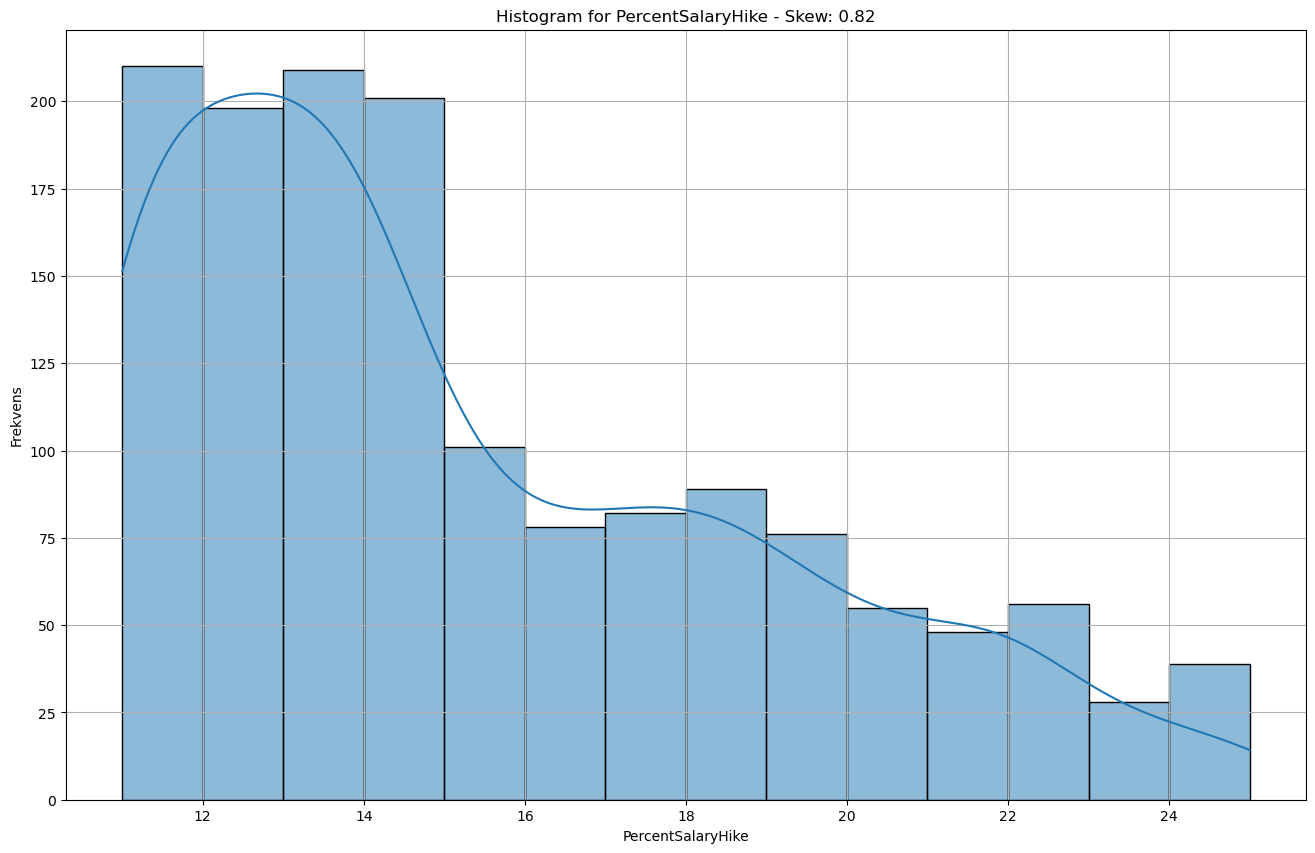

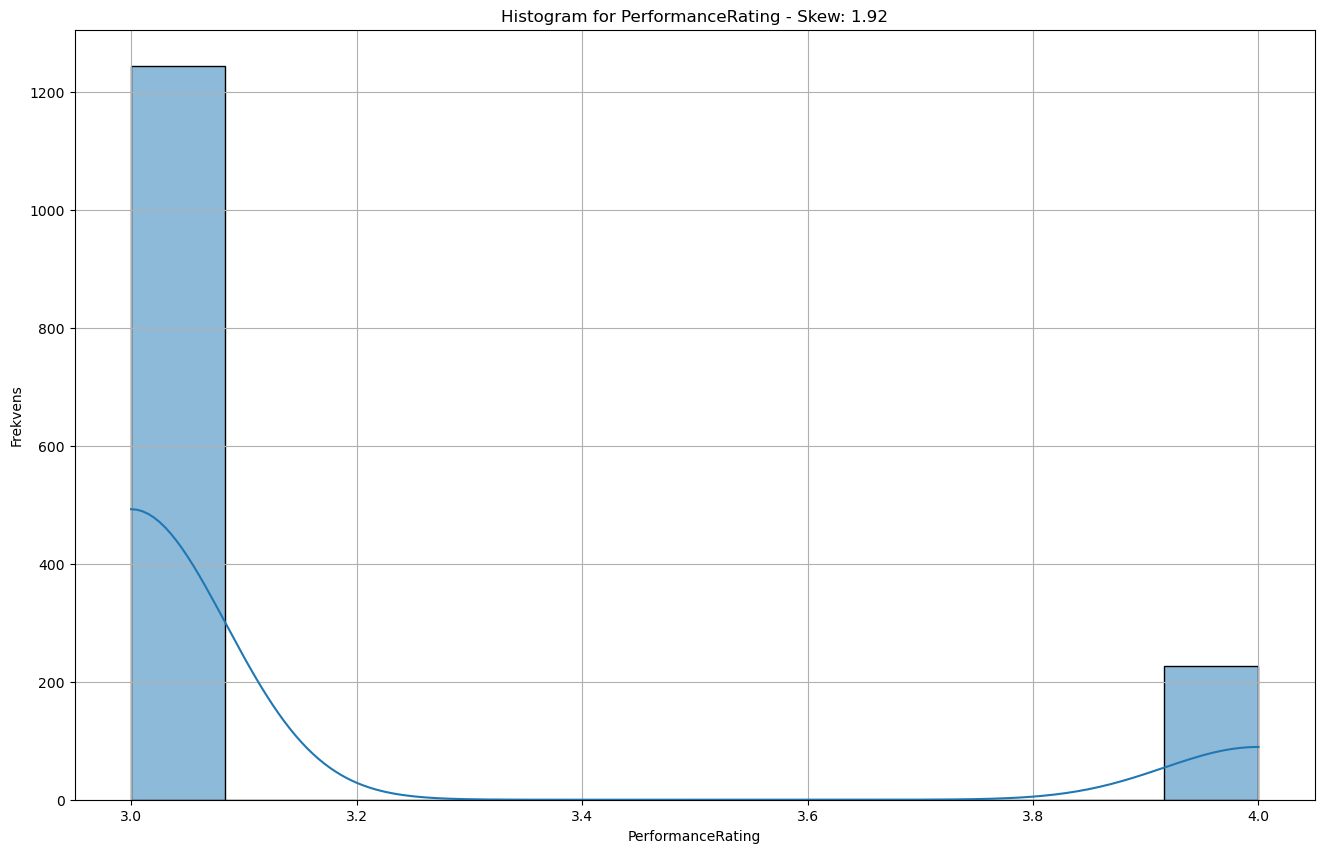

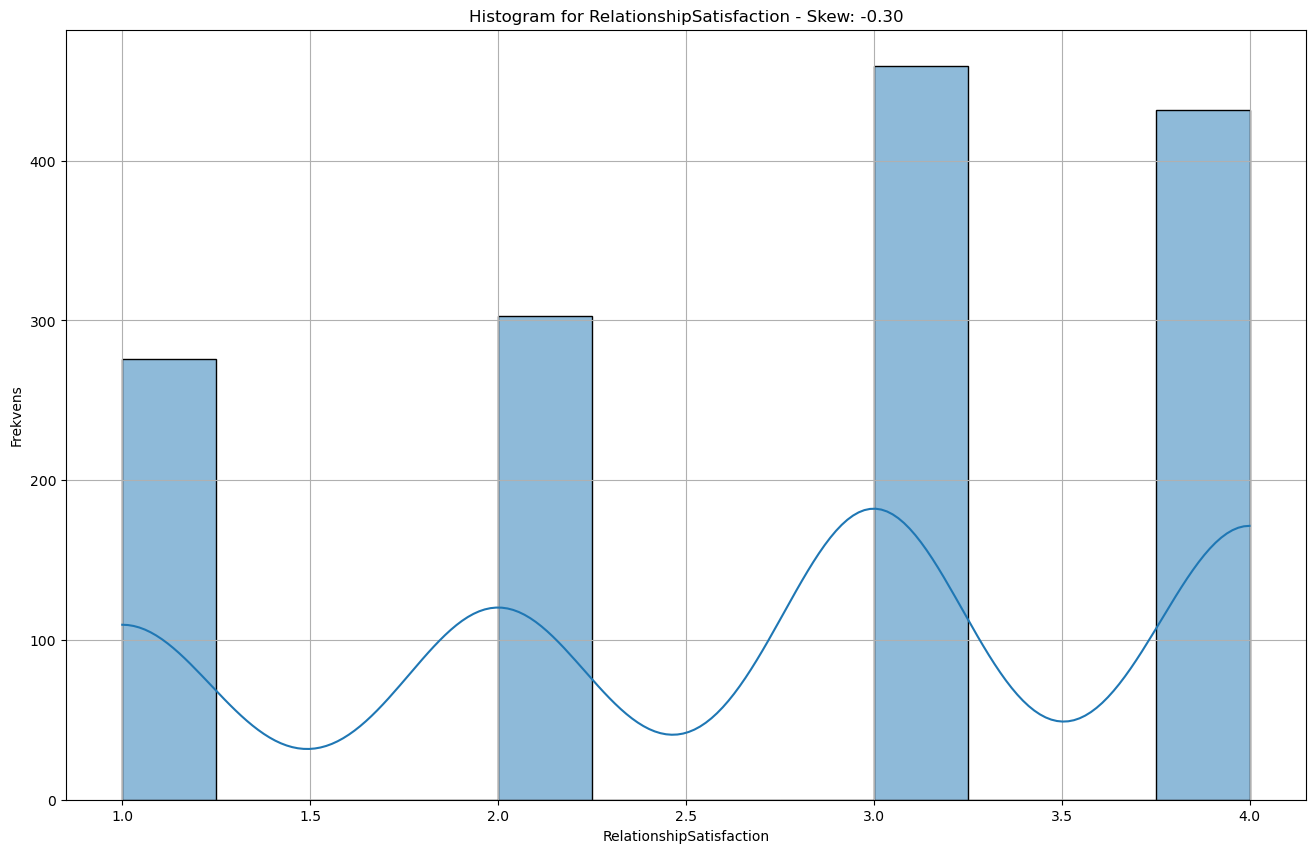

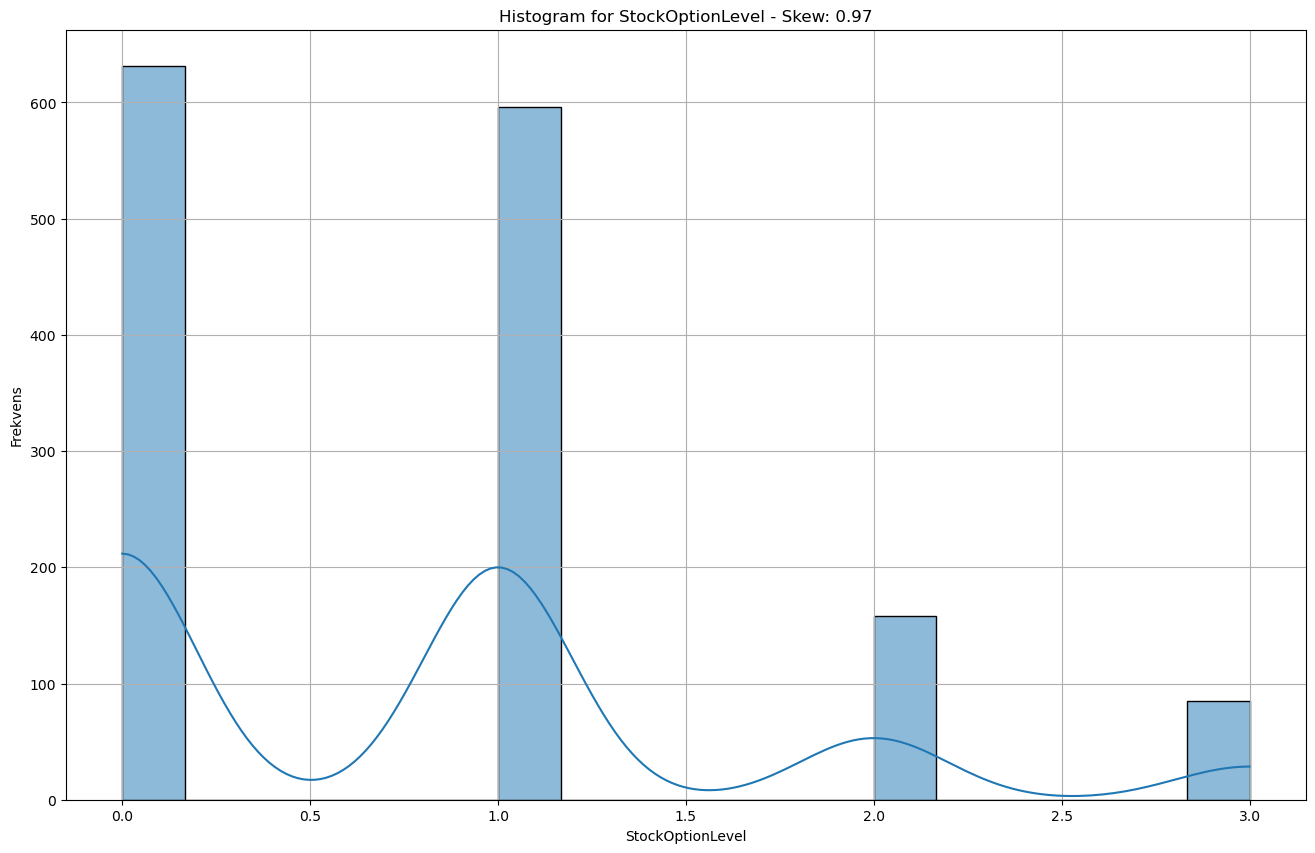

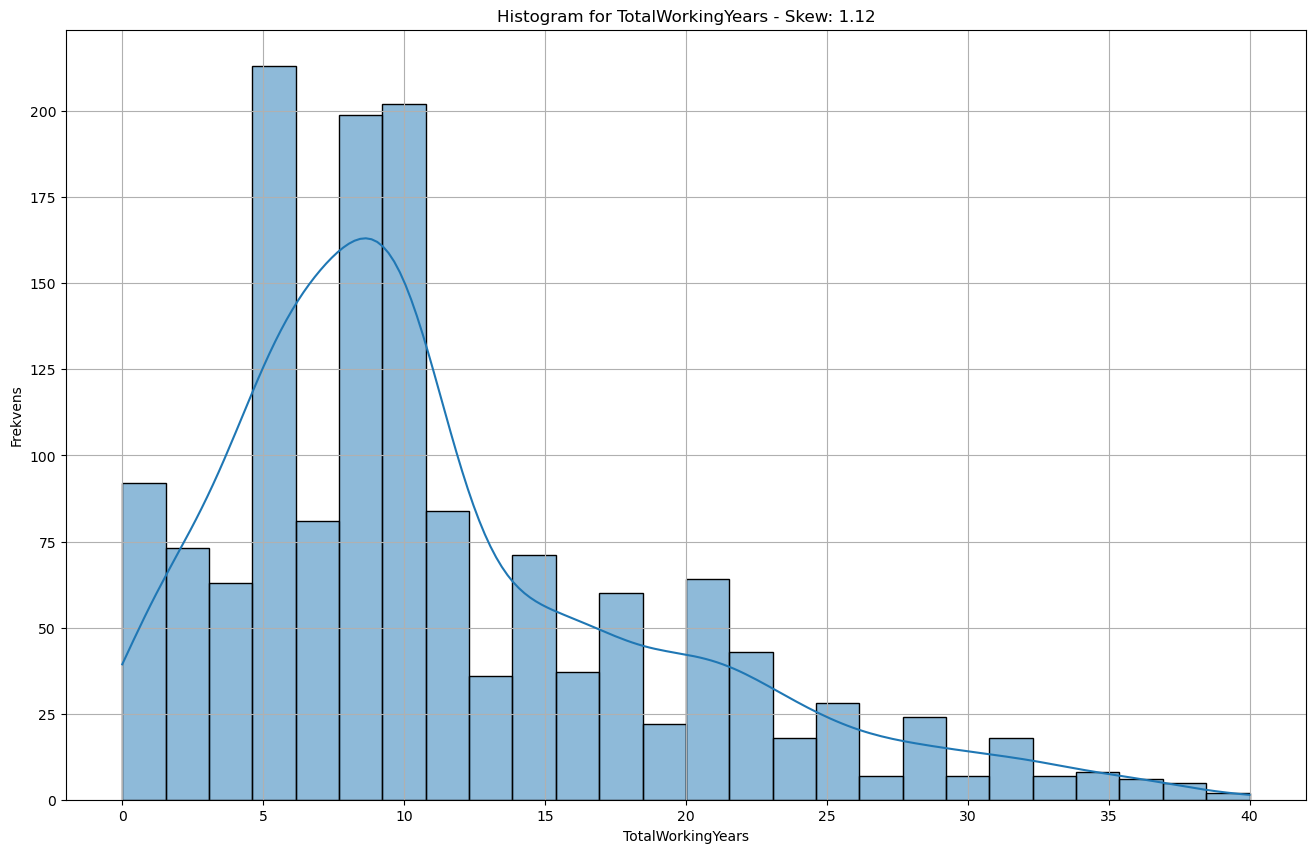

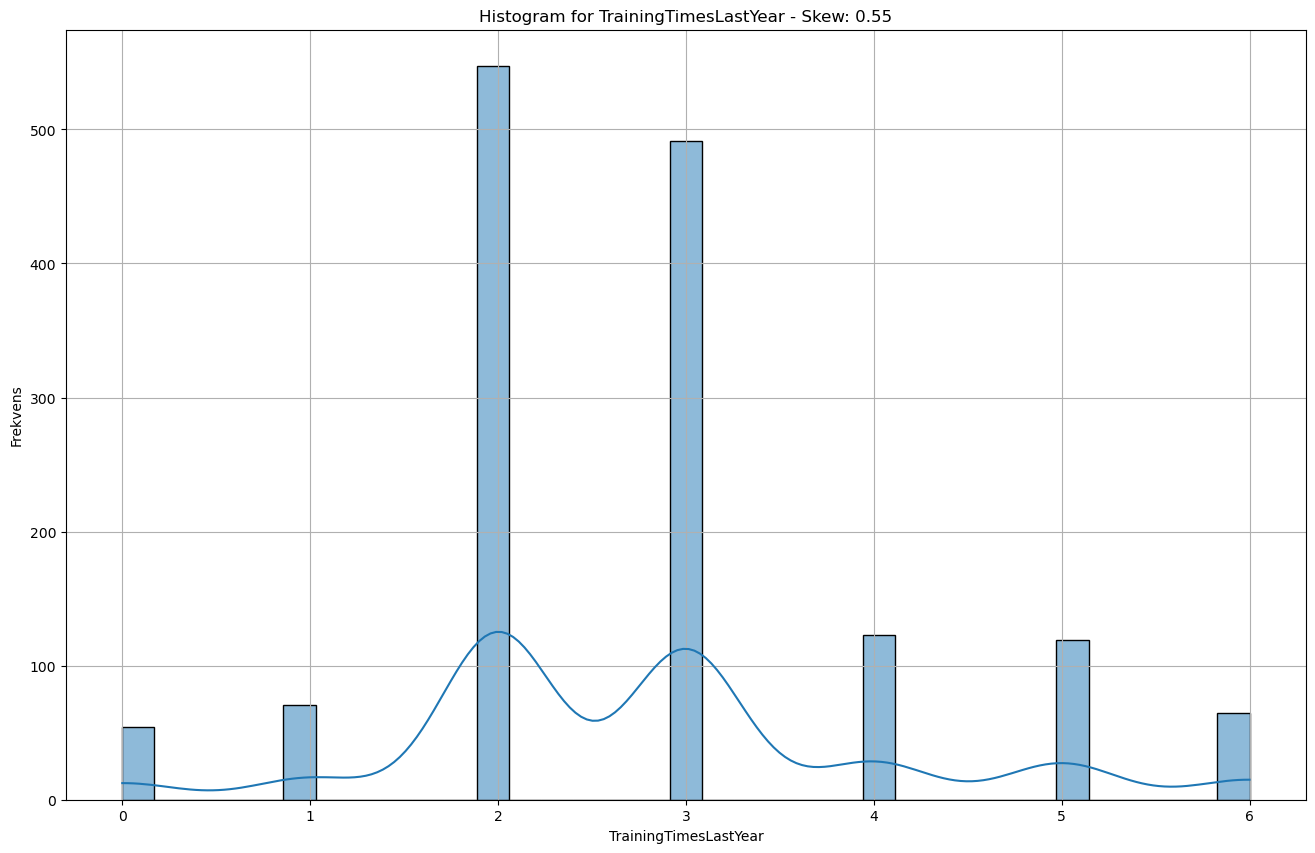

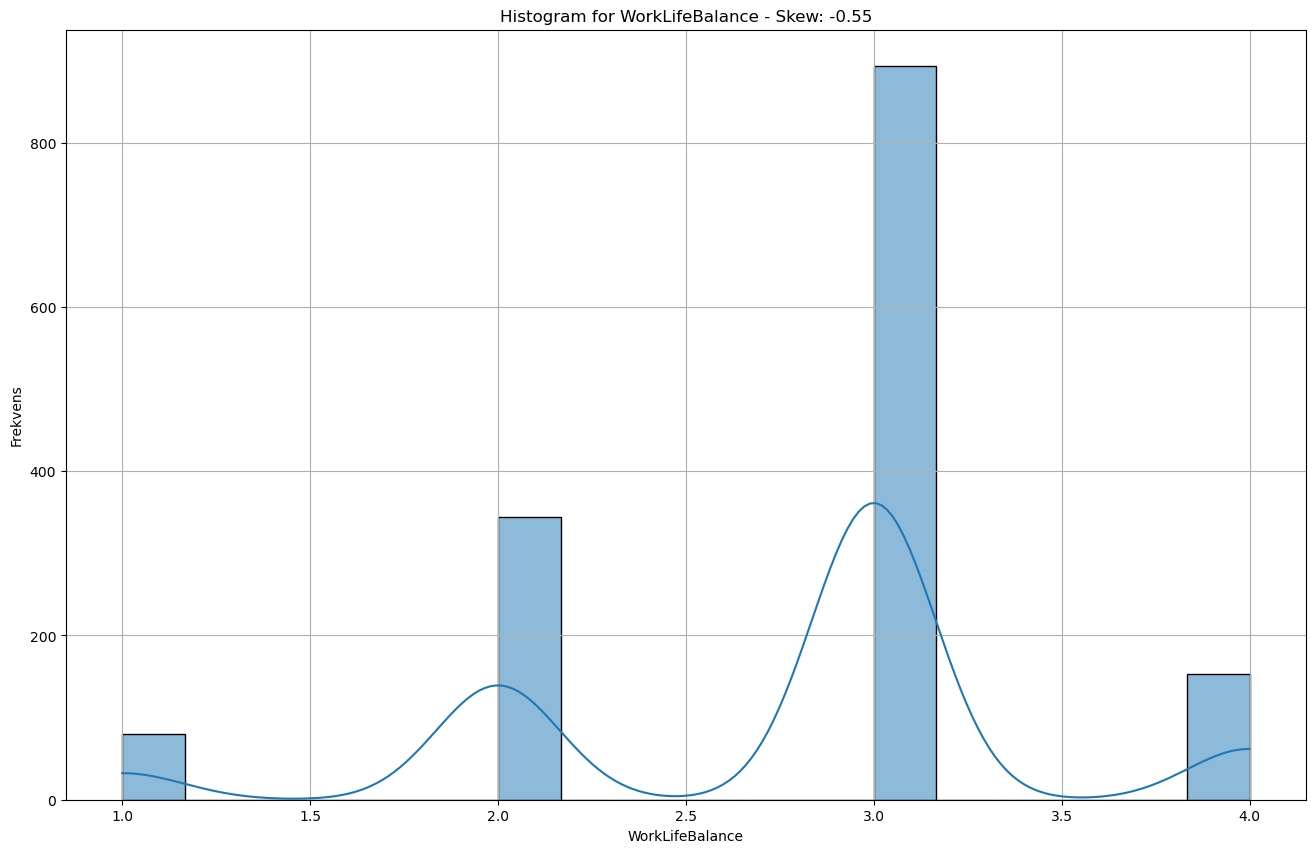

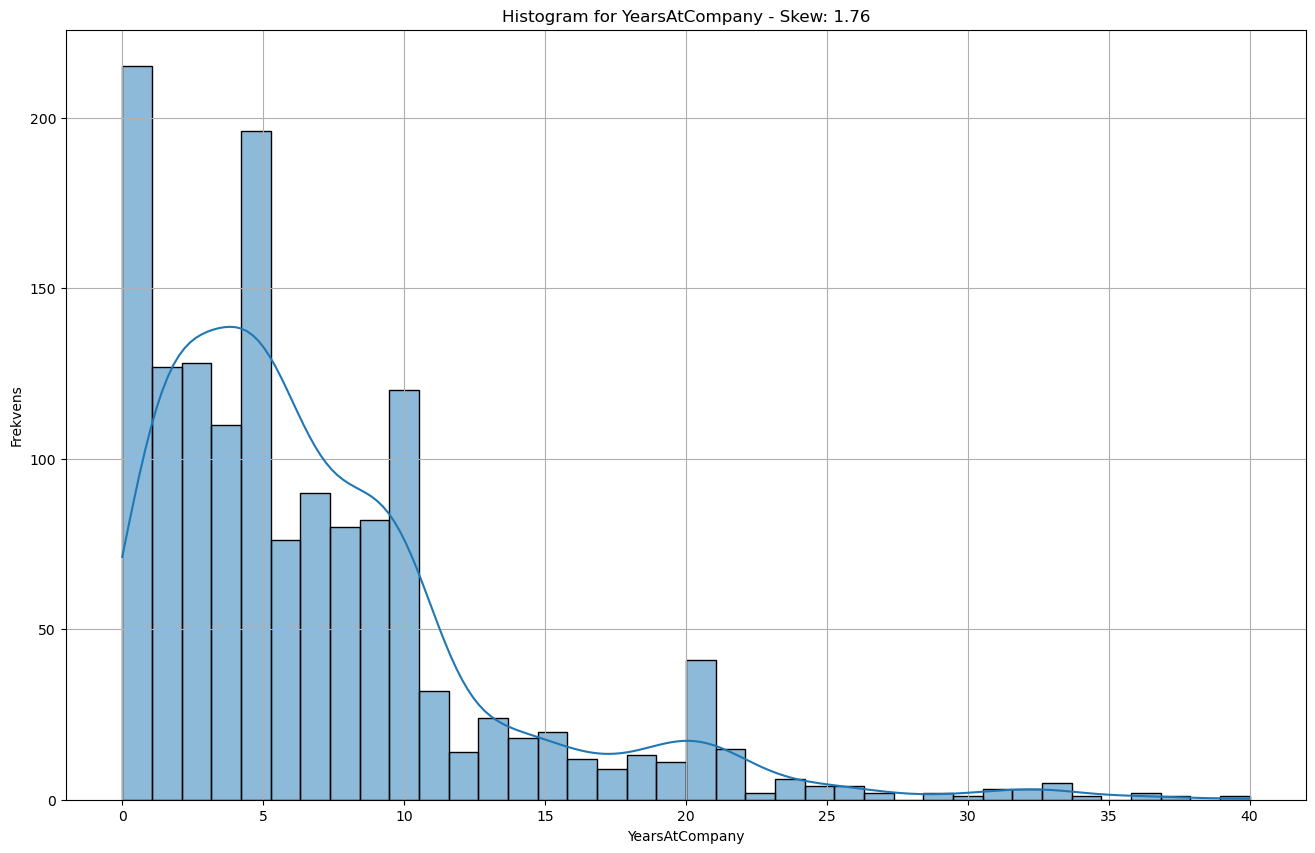

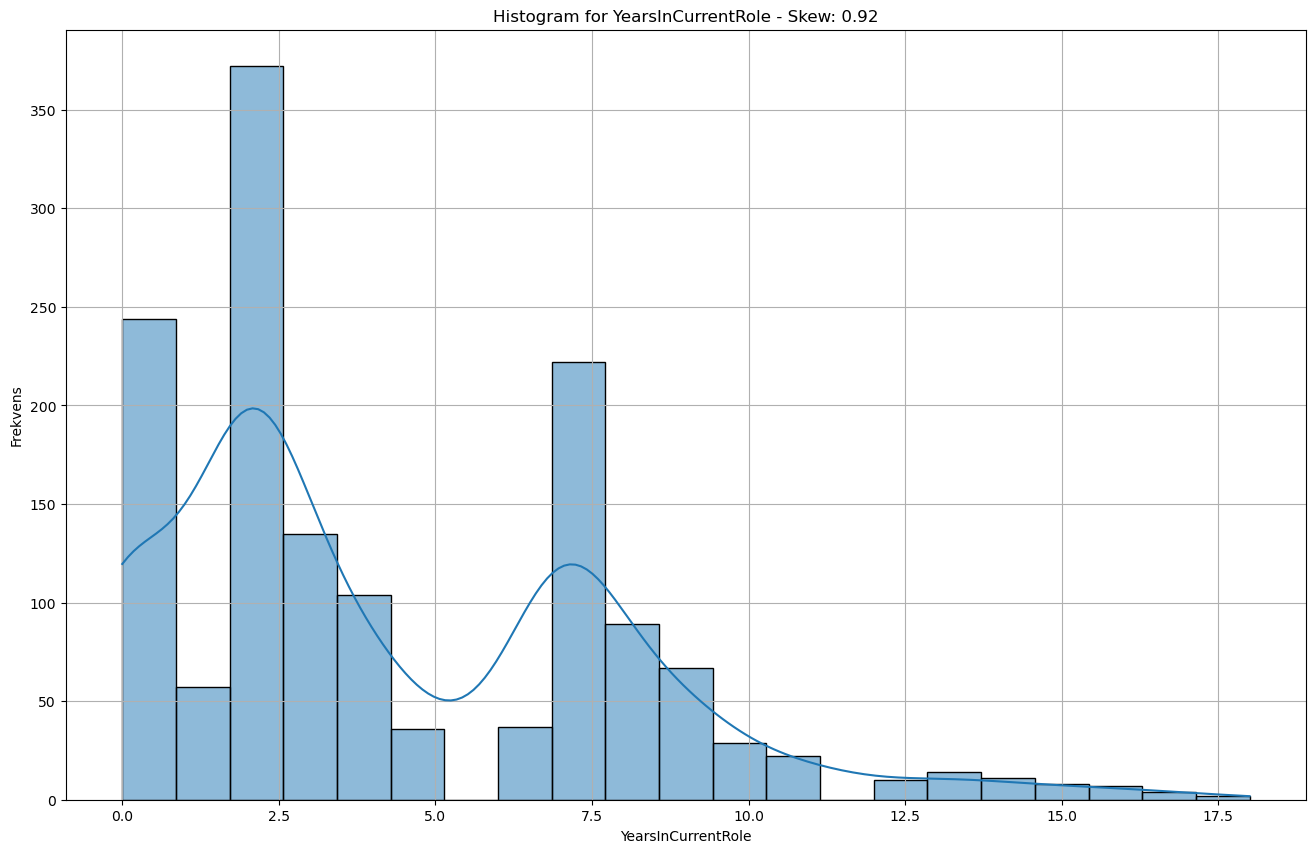

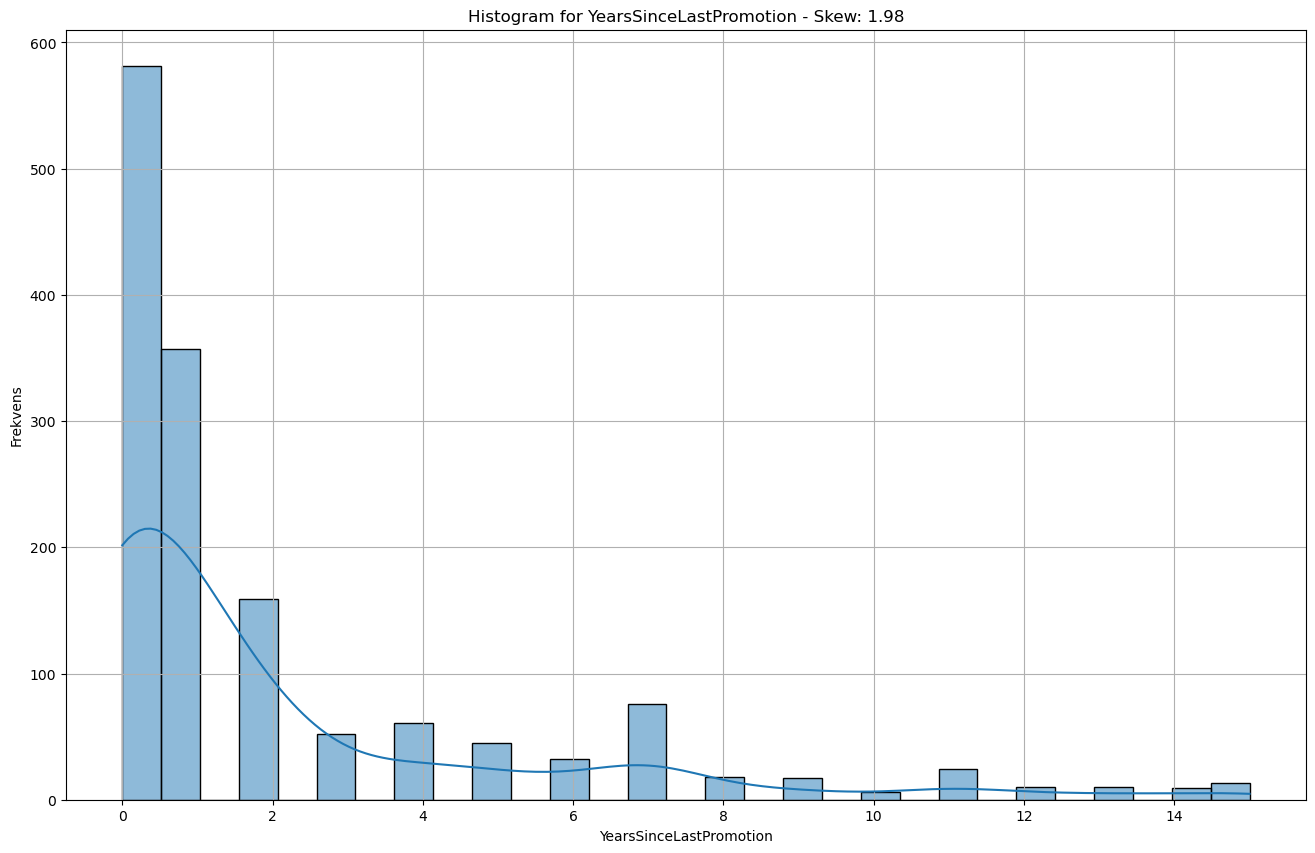

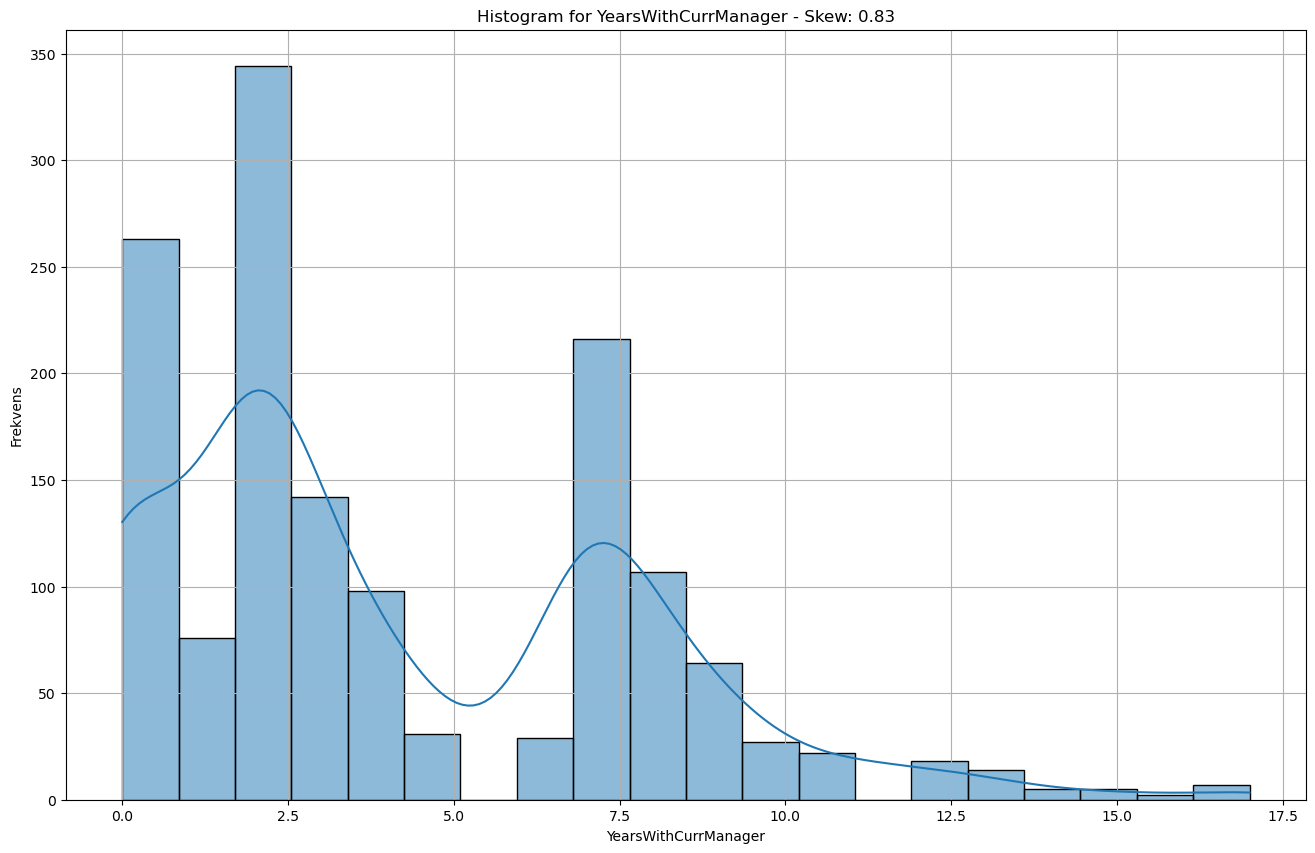

Skævhed for numeriske kolonner:
Age                         0.412864
DailyRate                  -0.003515
DistanceFromHome            0.957140
Education                  -0.289385
EmployeeNumber              0.016557
EnvironmentSatisfaction    -0.321326
HourlyRate                 -0.032278
JobInvolvement             -0.497911
JobLevel                    1.024355
JobSatisfaction            -0.329335
MonthlyIncome               1.368419
MonthlyRate                 0.018559
NumCompaniesWorked          1.025423
PercentSalaryHike           0.820290
PerformanceRating           1.919921
RelationshipSatisfaction   -0.302518
StockOptionLevel            0.967991
TotalWorkingYears           1.116032
TrainingTimesLastYear       0.552560
WorkLifeBalance            -0.551916
YearsAtCompany              1.762728
YearsInCurrentRole          0.916427
YearsSinceLastPromotion     1.982265
YearsWithCurrManager        0.832600
dtype: float64


In [134]:
# Vælger kun numeriske kolonner
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Filtrerer kolonner med lav variation (for at undgå skævhed på næsten konstante kolonner)
numerical_data = numerical_data.loc[:, numerical_data.nunique() > 1]

# Beregner skewness for hver numerisk kolonne
skew_values = numerical_data.apply(skew)

# Plotter histogrammer for de numeriske kolonner
for col in numerical_data.columns:
    plt.figure(figsize=(16, 10))  
    sns.histplot(numerical_data[col], kde=True)  
    plt.title(f'Histogram for {col} - Skew: {skew_values[col]:.2f}')
    plt.xlabel(col)
    plt.ylabel('Frekvens')
    plt.grid(True)
    plt.show()

# Udskriver skævheden for hver numerisk kolonne
print("Skævhed for numeriske kolonner:")
print(skew_values)

## Log-Transformation af Kolonner med Høj Skævhed

In [136]:
# Anvender log-transformation for kolonner med høj skævhed
data['MonthlyIncome'] = np.log1p(data['MonthlyIncome'])  # Log-transformation
data['JobLevel'] = np.log1p(data['JobLevel'])
data['NumCompaniesWorked'] = np.log1p(data['NumCompaniesWorked'])
data['TotalWorkingYears'] = np.log1p(data['TotalWorkingYears'])
data['YearsAtCompany'] = np.log1p(data['YearsAtCompany'])
data['YearsInCurrentRole'] = np.log1p(data['YearsInCurrentRole'])
data['YearsSinceLastPromotion'] = np.log1p(data['YearsSinceLastPromotion'])
data['YearsWithCurrManager'] = np.log1p(data['YearsWithCurrManager'])
data['StockOptionLevel'] = np.log1p(data['StockOptionLevel'])  
data['PercentSalaryHike'] = np.log1p(data['PercentSalaryHike']) 

For at forbedre dataenes normalfordeling og gøre dem mere egnede til lineær regression, er log-transformation anvendt på de kolonner, der har høj skævhed. Skævhed kan forvrænge relationerne mellem variabler og reducere modellens præstation, så en log-transformation hjælper med at gøre dataene mere lineært fordelte.

## Beregning af Skævhed Efter Transformation

In [139]:
# Vælger kun numeriske kolonner
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Filtrerer kolonner med lav variation (for at undgå skævhed på næsten konstante kolonner)
numerical_data = numerical_data.loc[:, numerical_data.nunique() > 1]

# Beregner skævheden for hver numerisk kolonne
skew_values_after = numerical_data.apply(skew)

# Udskriver skævheden efter transformation
print("Skævhed efter transformation:")
print(skew_values_after)

Skævhed efter transformation:
Age                         0.412864
DailyRate                  -0.003515
DistanceFromHome            0.957140
Education                  -0.289385
EmployeeNumber              0.016557
EnvironmentSatisfaction    -0.321326
HourlyRate                 -0.032278
JobInvolvement             -0.497911
JobLevel                    0.447676
JobSatisfaction            -0.329335
MonthlyIncome               0.286156
MonthlyRate                 0.018559
NumCompaniesWorked          0.092801
PercentSalaryHike           0.513018
PerformanceRating           1.919921
RelationshipSatisfaction   -0.302518
StockOptionLevel            0.271685
TotalWorkingYears          -0.621540
TrainingTimesLastYear       0.552560
WorkLifeBalance            -0.551916
YearsAtCompany             -0.207496
YearsInCurrentRole         -0.383106
YearsSinceLastPromotion     0.718071
YearsWithCurrManager       -0.357321
dtype: float64


For at analysere fordelingen af de numeriske kolonner blev både skævheden beregnet og histogrammer anvendt. Dette gav indsigt i, hvilke kolonner der havde høj skævhed og potentielle outliers. Skævhed kan skabe problemer for modeller som lineær regression, der antager normalfordeling.

Derfor blev log-transformationer anvendt på de mest skæve kolonner. Efterfølgende beregninger viser, at transformationerne reducerede skævheden i flere tilfælde.

Hvis en kolonne følger en klokkeformet fordeling (normalfordeling), kan z-score-teknikken bruges til at fjerne outliers.

In [142]:
# Kopierer datasættet for at bevare originalen
cleaned_data = data.copy()

# Anvender z-score rensning med median-imputering
cols_to_clean = ['MonthlyIncome', 'JobLevel', 'NumCompaniesWorked',
                 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
                 'YearsWithCurrManager', 'StockOptionLevel', 'PercentSalaryHike']

for col in cols_to_clean:
    z_scores = np.abs(zscore(cleaned_data[col]))
    median = cleaned_data[col].median()
    cleaned_data.loc[z_scores > 3, col] = median

Dette er de transformerede histogrammer:

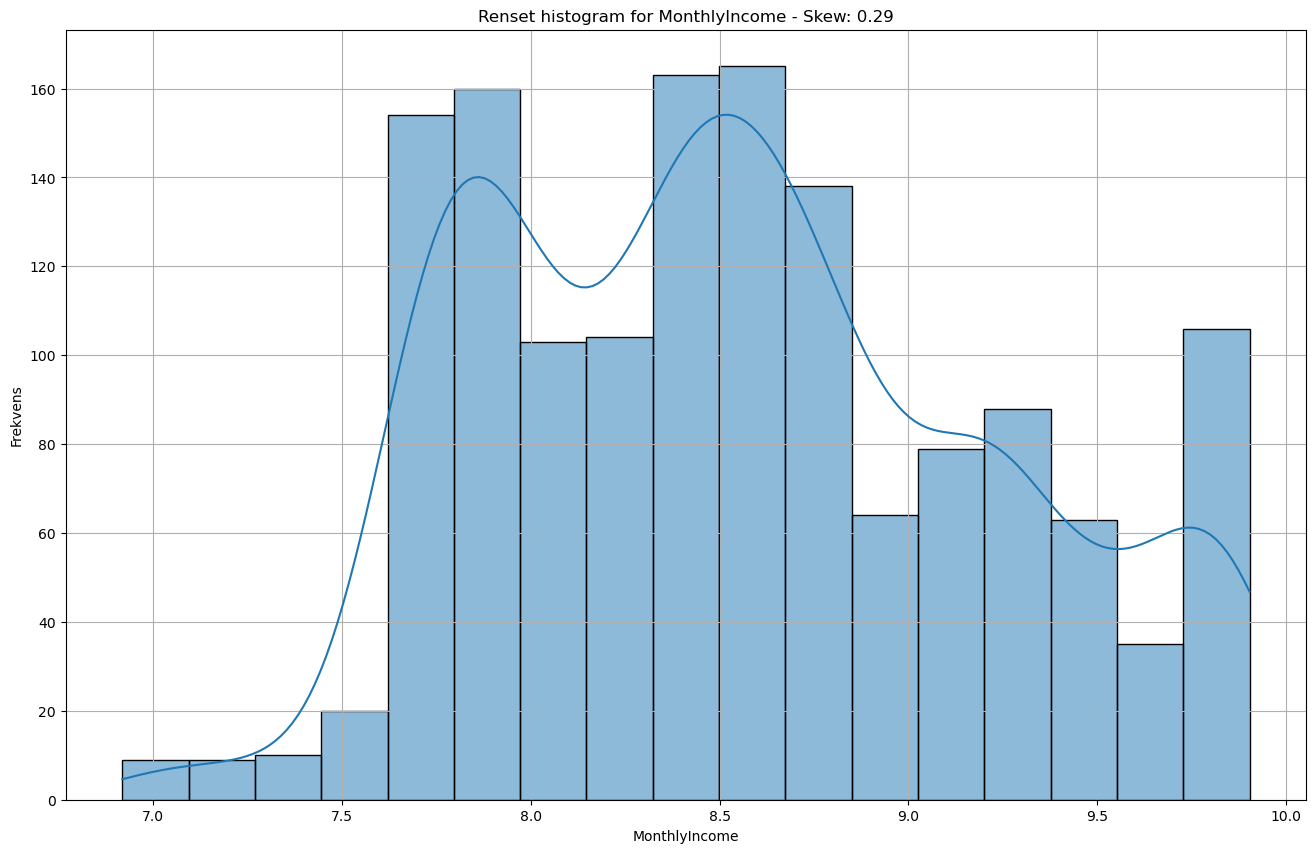

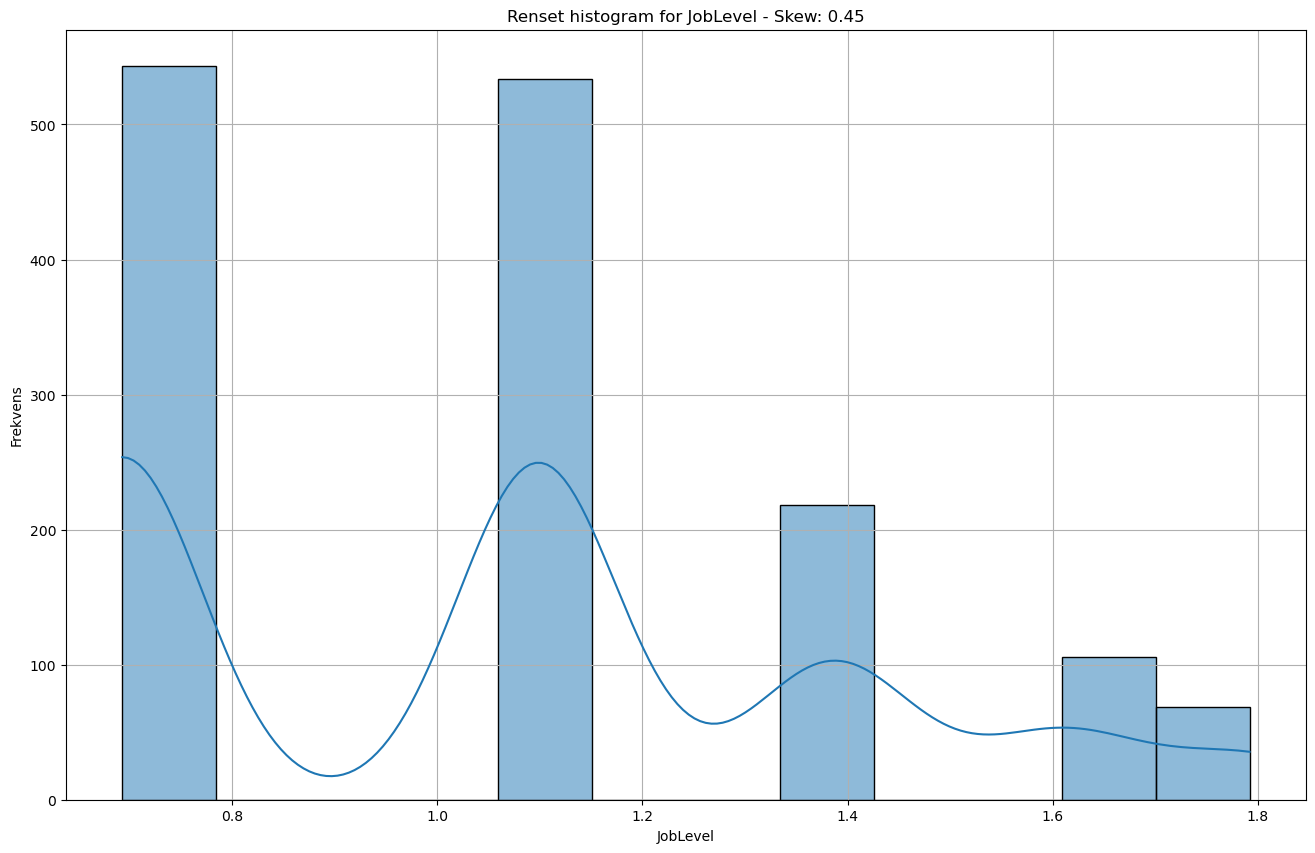

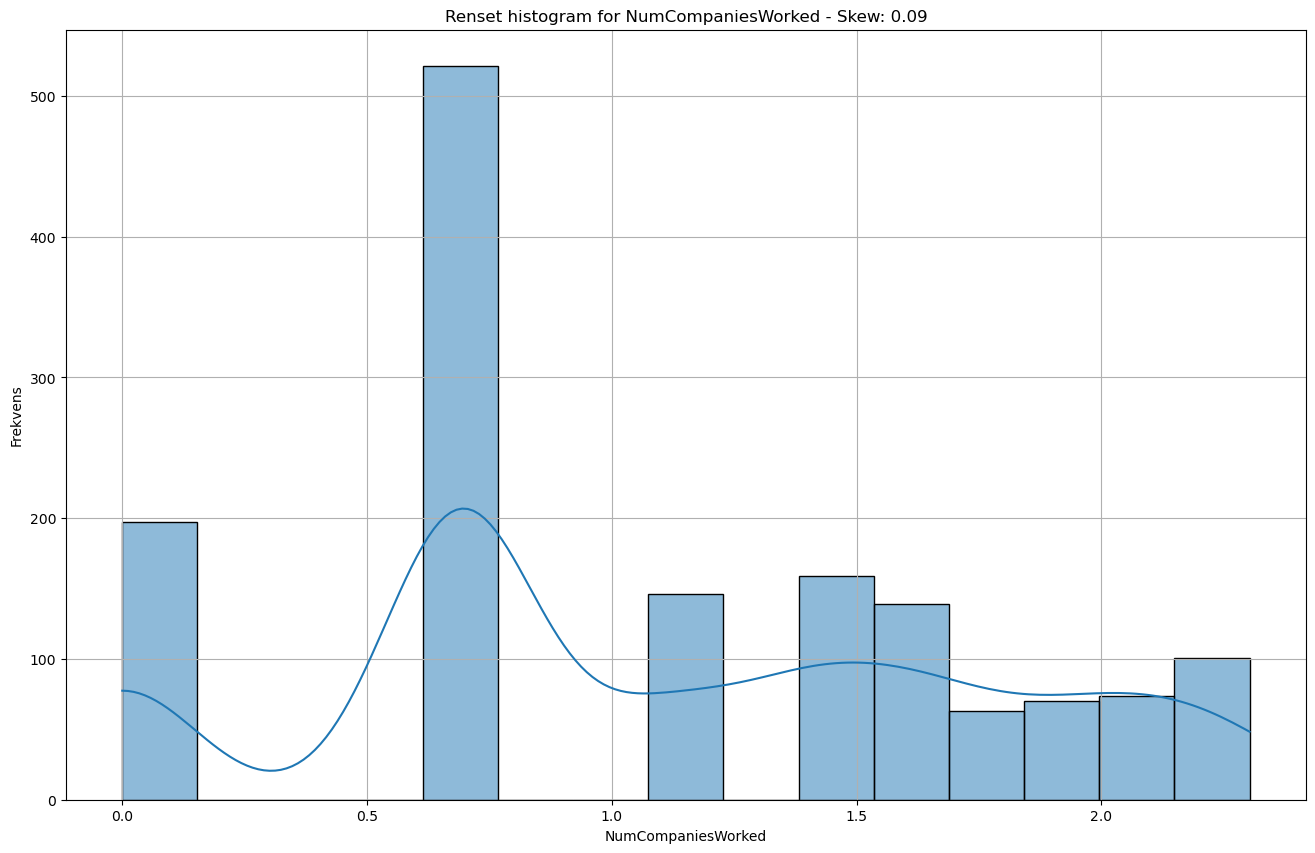

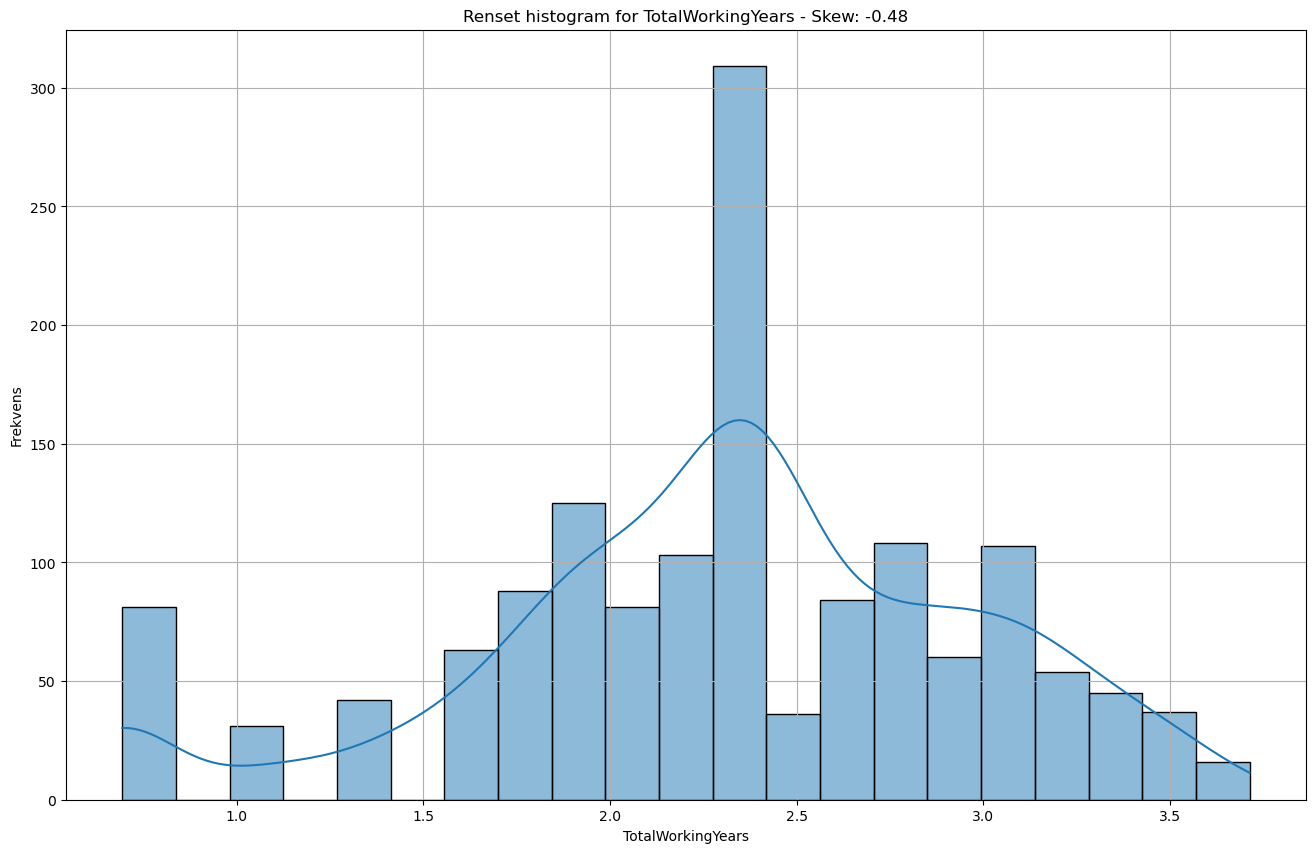

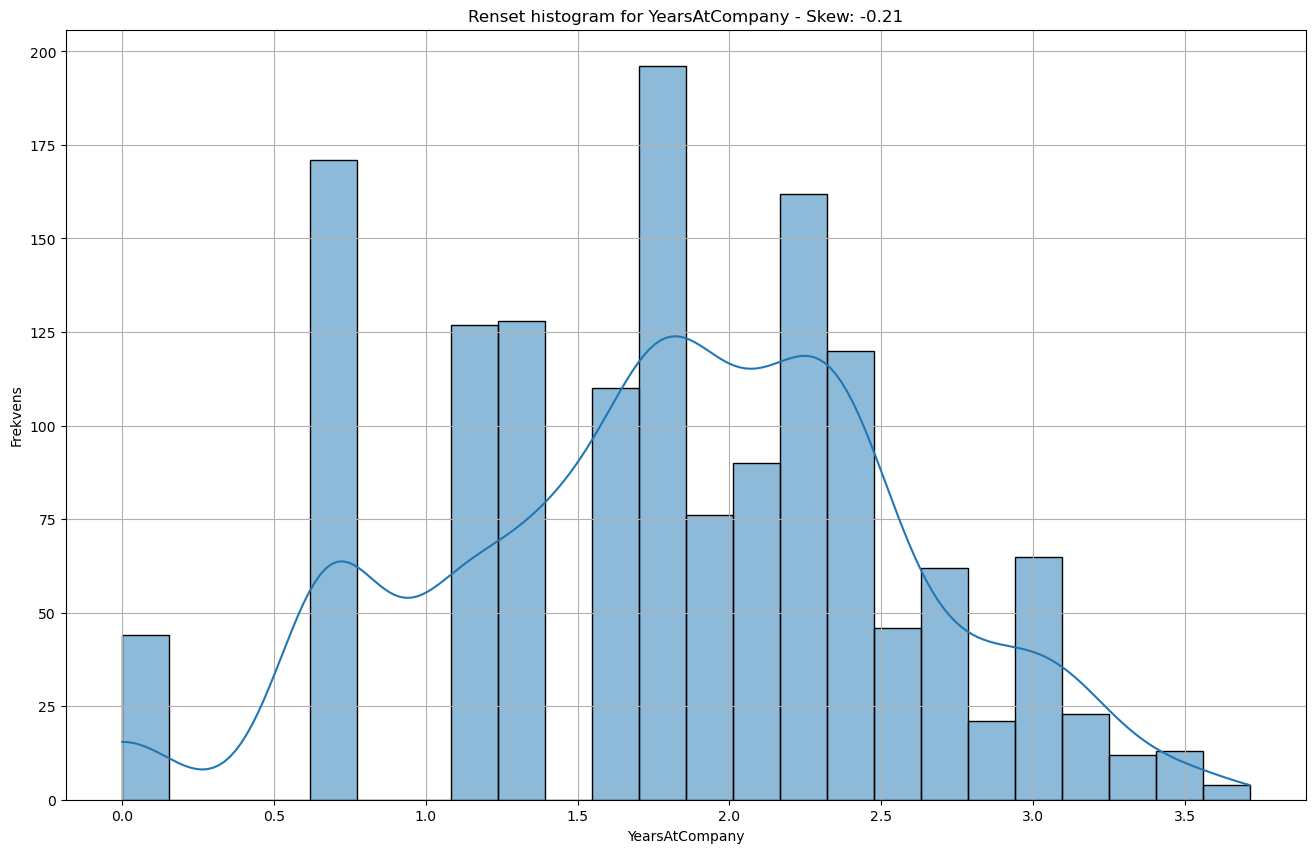

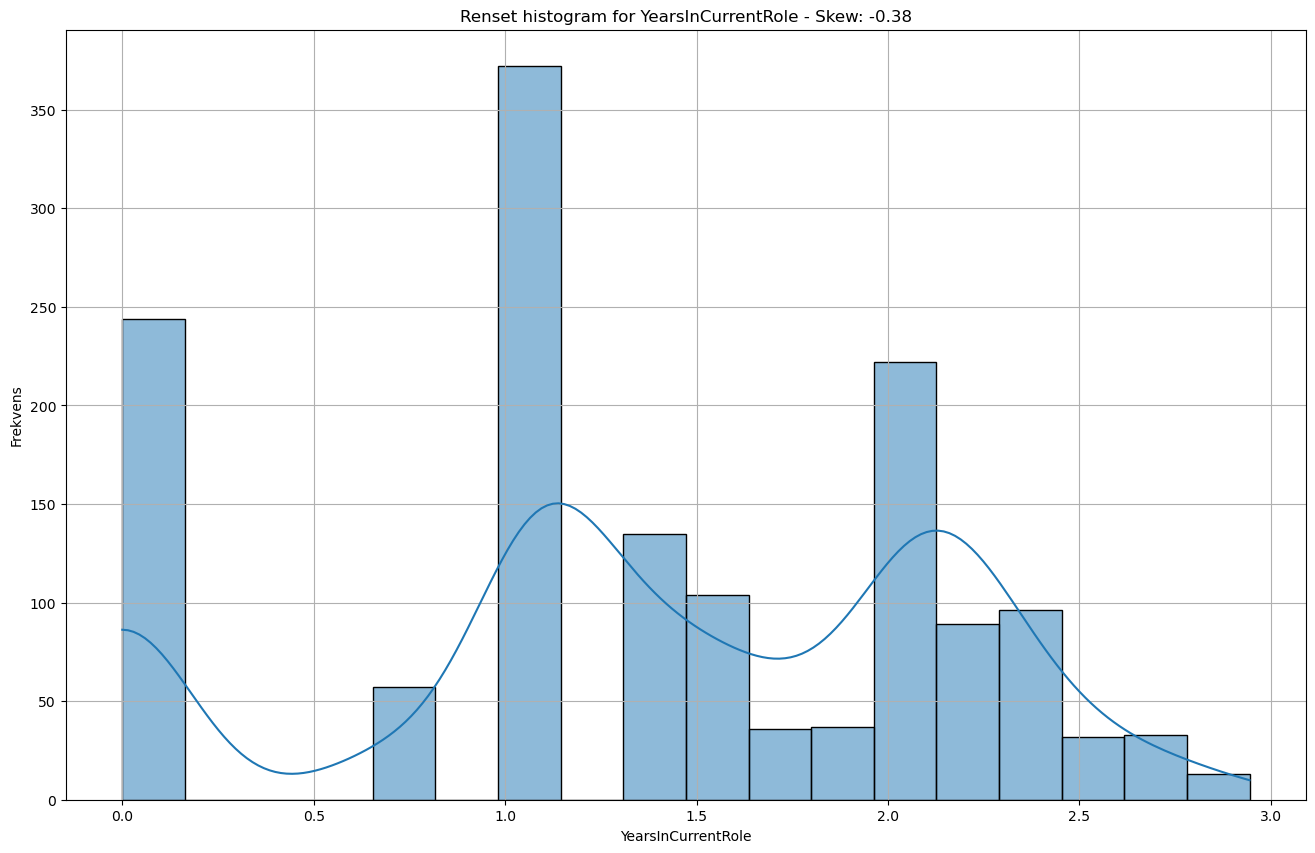

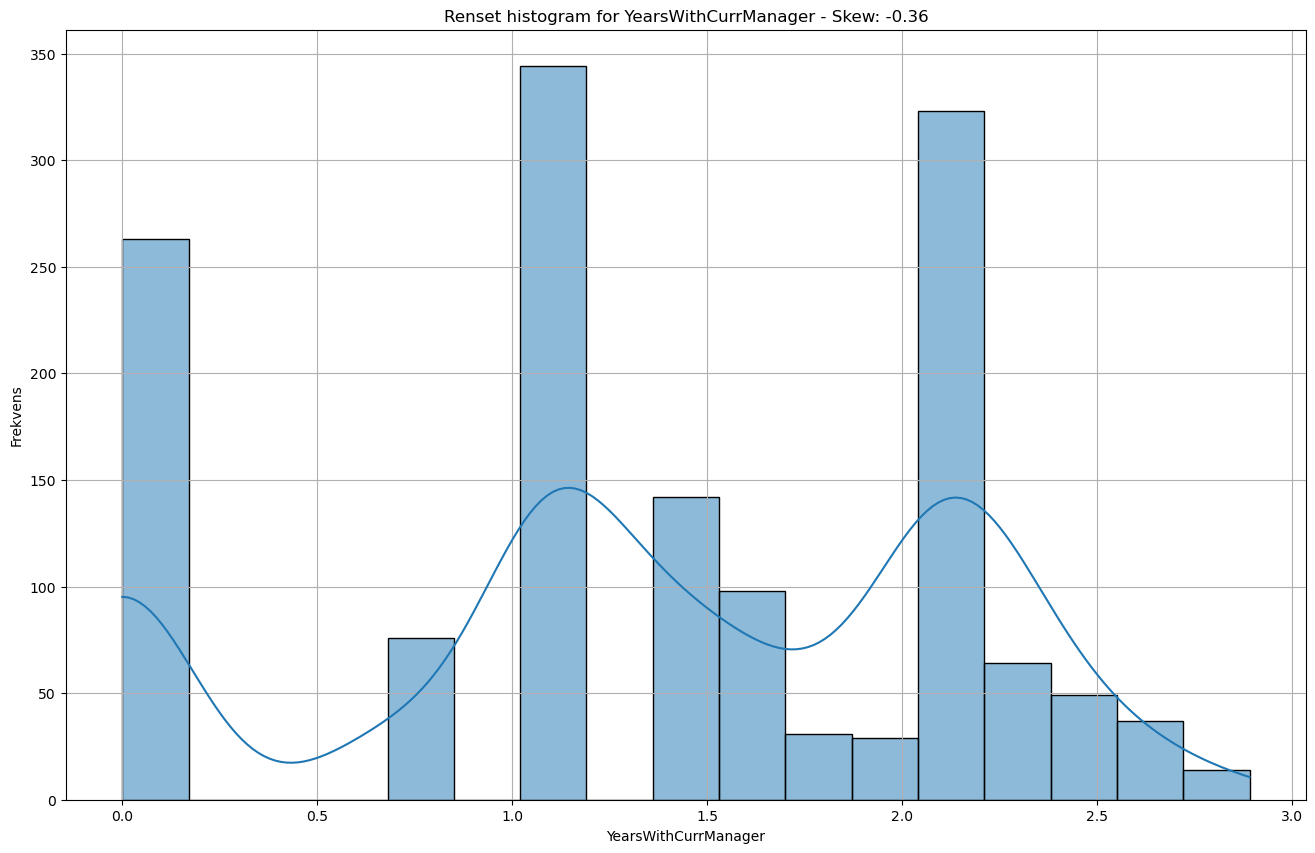

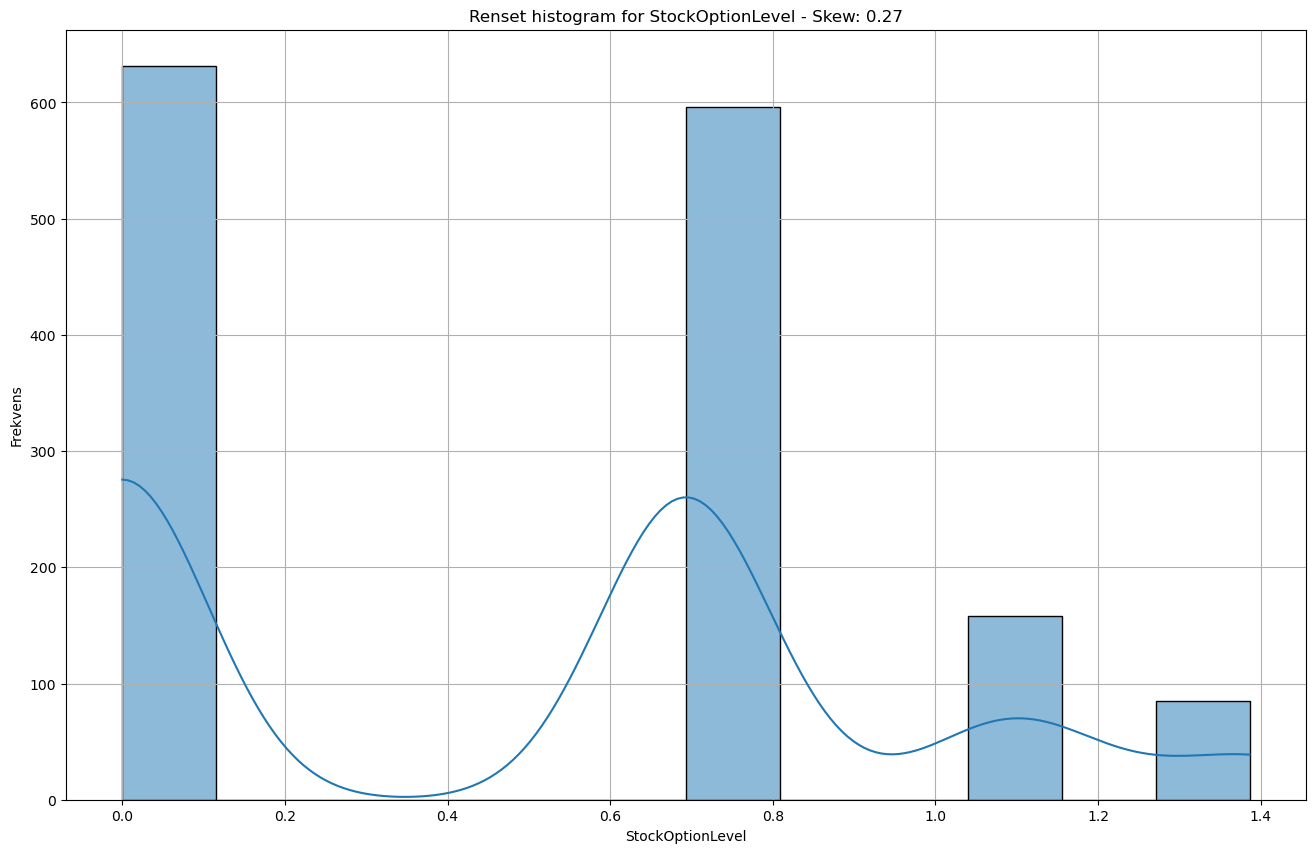

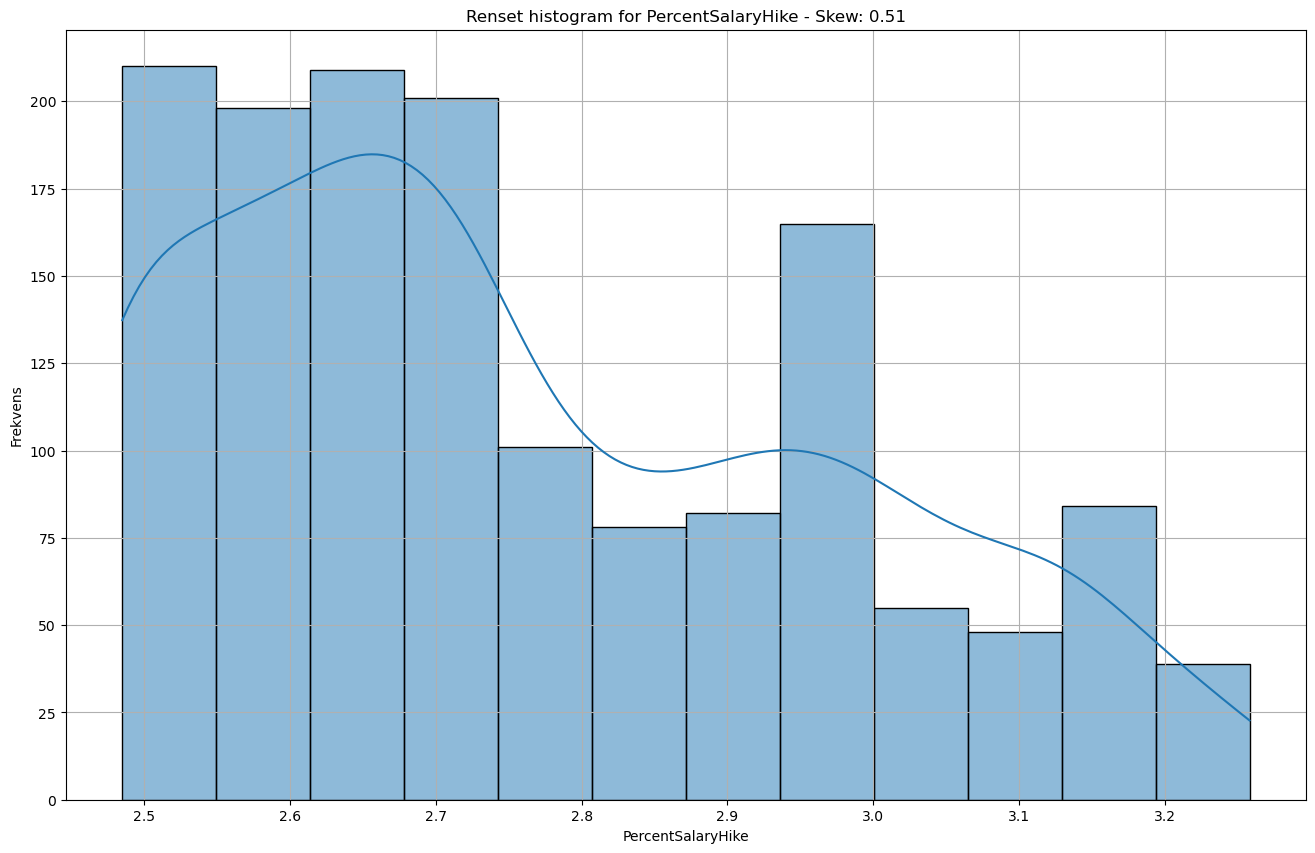

In [144]:
# Visualisering af de rensede kolonner
for col in cols_to_clean:
    plt.figure(figsize=(16, 10))  
    sns.histplot(cleaned_data[col], kde=True)
    
    # Beregn skævhed
    skewness = skew(cleaned_data[col].dropna())
    
    plt.title(f'Renset histogram for {col} - Skew: {skewness:.2f}')  
    plt.xlabel(col)
    plt.ylabel('Frekvens')
    plt.grid(True)
    plt.show()


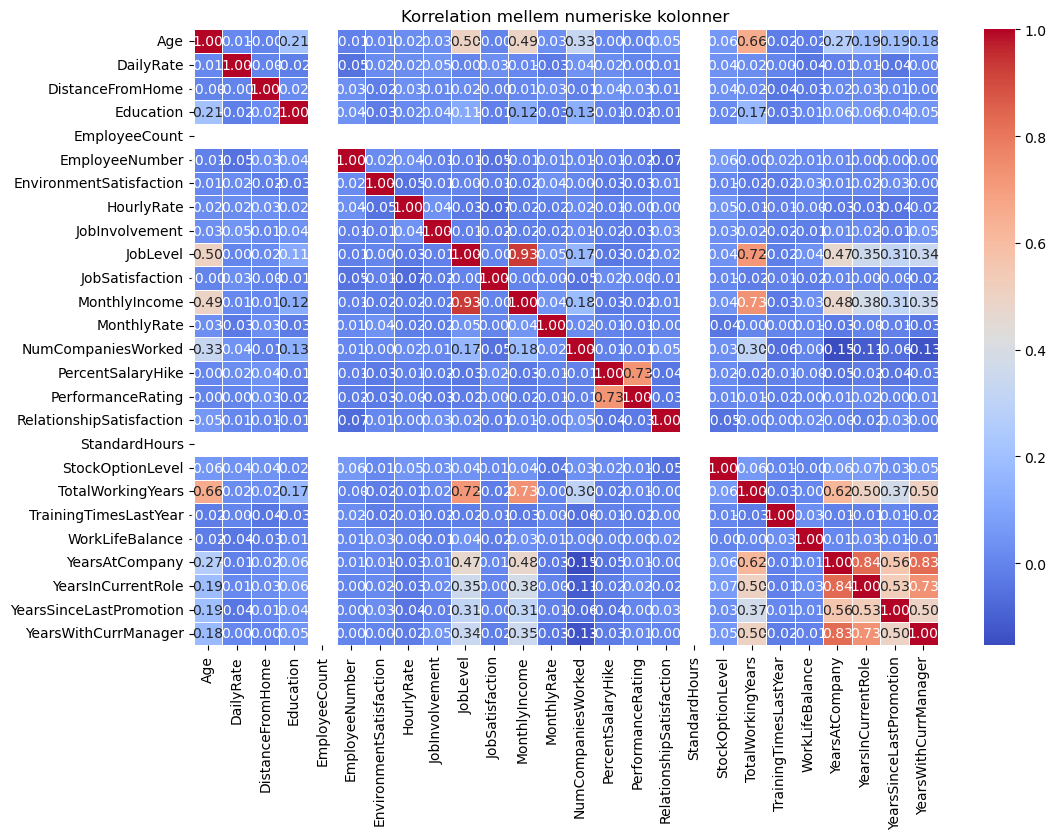

In [145]:
# Vælger de numeriske kolonner
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Beregner korrelationer for de numeriske kolonner
correlation_matrix = numerical_data.corr()

# Visualisering af korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korrelation mellem numeriske kolonner')
plt.show()

- **Stærk negativ korrelation:**  
  - *Age* og *DailyRate* (-1.00), hvilket indikerer, at ældre medarbejdere har lavere daglige satser.  
  - *Age* og *MonthlyIncome* (-0.50), som tyder på, at ældre medarbejdere generelt har lavere månedsløn.

- **Stærk positiv korrelation:**  
  - *TotalWorkingYears* og *YearsAtCompany* (0.78), da disse to funktioner ofte stiger sammen over tid.  
  - *YearsAtCompany* og *MonthlyIncome* (0.51), hvilket tyder på, at medarbejdere med længere ansættelse får højere løn.

- **Moderate korrelationer:**  
  - *MonthlyIncome* har positiv korrelation med både *YearsAtCompany* og *JobLevel*.  
  - *JobSatisfaction* og *YearsAtCompany* (-0.20), som kan indikere, at medarbejdere med længere anciennitet måske er mindre tilfredse med deres job.

- **Svag korrelation:**  
  - De fleste andre funktioner har svage korrelationer, hvilket betyder, at de ikke har en signifikant lineær sammenhæng med de andre variabler.

## Forberedelse af data

In [152]:
# Udvælgelse af relevante kolonner for regression og klassifikation
relevant_columns = [
    'Attrition',
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 'JobRole',
    'Department', 'Gender', 'MaritalStatus', 'OverTime', 'Education', 'JobSatisfaction'
]

# Vælger de relevante kolonner fra datasættet
data_selected = data[relevant_columns]

# Forberedelse af kategoriske kolonner (One-Hot Encoding)
data_encoded = pd.get_dummies(data_selected, drop_first=True)

# Tjekker de første 5 rækker af den bearbejdede data
print(data_encoded.head())

   Age  DistanceFromHome  MonthlyIncome  YearsAtCompany  Education  \
0   41                 1       8.698514        1.945910          2   
1   49                 8       8.543056        2.397895          1   
2   37                 2       7.645398        0.000000          2   
3   33                 3       7.975908        2.197225          4   
4   27                 2       8.151622        1.098612          1   

   JobSatisfaction  Attrition_Yes  JobRole_Human Resources  \
0                4           True                    False   
1                2          False                    False   
2                3           True                    False   
3                3          False                    False   
4                2          False                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                           True            Fal

De relevante kolonner er valgt, og One-Hot Encoding er udført for de kategoriske kolonner som Gender, JobRole, OverTime osv.

## Skalering af data

In [156]:
# Skalering af numeriske funktioner
numerical_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']

scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

# Tjekker den skalerede data
print(data_encoded.head())

        Age  DistanceFromHome  MonthlyIncome  YearsAtCompany  Education  \
0  0.446350         -1.010909       0.219493        0.177344          2   
1  1.322365         -0.147150      -0.014600        0.774724          1   
2  0.008343         -0.887515      -1.366318       -2.394527          2   
3 -0.429664         -0.764121      -0.868626        0.509502          4   
4 -1.086676         -0.887515      -0.604032       -0.942513          1   

   JobSatisfaction  Attrition_Yes  JobRole_Human Resources  \
0                4           True                    False   
1                2          False                    False   
2                3           True                    False   
3                3          False                    False   
4                2          False                    False   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                

De numeriske kolonner bliver skaleret til at have et gennemsnit på 0 og en standardafvigelse på 1, hvilket er nødvendigt for at sikre, at alle funktioner bidrager lige til maskinlæringsmodellen.

## Opdeling af data

In [162]:
# Opdeling af data i funktioner (X) og målvariabel (y)
y = data_encoded['Attrition_Yes']  # Antager at kolonnen hedder 'Attrition_Yes'
X = data_encoded.drop('Attrition_Yes', axis=1)  # Dropper 'Attrition_Yes' fra funktionerne

# Opdeling af data i trænings- og testdatasæt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Træningsdata form: {X_train.shape}")
print(f"Testdata form: {X_test.shape}")

Træningsdata form: (1176, 20)
Testdata form: (294, 20)


Dataen opdeles i trænings og testdatasæt med en teststørrelse på 20%. Træningsdatasættet er klar til at blive brugt til at træne modeller, mens testdatasættet kan bruges til at evaluere modellernes præstation.

## Clustering data

In [166]:
# Vælger relevante funktioner for clustering
clustering_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction']

# Udvælger de relevante data (lav en kopi eksplicit)
data_clustering = data[clustering_features].copy()

# Skalering af data da det er vigtigt for clustering
# Først ændrer vi datatype til float64 for de relevante kolonner
data_clustering[clustering_features] = data_clustering[clustering_features].astype('float64')

# Derefter skaleres dataene
data_clustering.loc[:, clustering_features] = scaler.fit_transform(data_clustering[clustering_features])

print(data_clustering.head())

        Age  DistanceFromHome  MonthlyIncome  YearsAtCompany  JobSatisfaction
0  0.446350         -1.010909       0.219493        0.177344         1.153254
1  1.322365         -0.147150      -0.014600        0.774724        -0.660853
2  0.008343         -0.887515      -1.366318       -2.394527         0.246200
3 -0.429664         -0.764121      -0.868626        0.509502         0.246200
4 -1.086676         -0.887515      -0.604032       -0.942513        -0.660853


De relevante funktioner for clustering er udvalgt, og dataene bliver skaleret for at sikre, at alle funktioner bidrager lige meget til clusteringalgoritmerne.

# Task 2 

## Opdeling af datasættet i features og target

In [171]:
# Definér en liste over de forklarende variable (features), som skal bruges til at forudsige indkomst
features = ['Age', 'TotalWorkingYears', 'Education', 'JobLevel', 'YearsAtCompany']

# Angiv navnet på den afhængige variabel (target), som modellen skal forudsige
target = 'MonthlyIncome'

# Udtræk features fra datasættet og gem dem i X (inputdata til modellen)
X = df[features]

# Udtræk target-variablen fra datasættet og gem den i y (outputdata til modellen)
y = df[target]

## Datasplitting

In [174]:
# Først split til train + midlertidig (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split resten i validering og test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Modeltræning: Linear Regression

In [177]:
# Opret en instans af en lineær regressionsmodel
model = LinearRegression()

# Træn modellen på træningsdatasættet (X_train og y_train)
model.fit(X_train, y_train)

LinearRegression()

## Tjek hvordan modellen klarer sig på valideringsdata

In [180]:
# Brug modellen til at lave forudsigelser på valideringsdatasættet
y_pred_val = model.predict(X_val)

# Beregn hvor langt forudsigelserne i gennemsnit er fra de rigtige værdier (MAE)
mae = mean_absolute_error(y_val, y_pred_val)

# Beregn den gennemsnitlige kvadrerede fejl – større fejl straffes mere (MSE)
mse = mean_squared_error(y_val, y_pred_val)

# Beregn hvor godt modellen passer til data – 1.0 er perfekt, 0.0 er dårlig (R²-score)
r2 = r2_score(y_val, y_pred_val)

# Vis resultaterne
print("Valideringsresultater:")
print("MAE:", mae)
print("MSE:", mse)
print("R²-score:", r2)

Valideringsresultater:
MAE: 1128.55638032731
MSE: 2124909.9921385935
R²-score: 0.880464245885713


## Sammenligning af forudsiget og faktisk indkomst i en graf

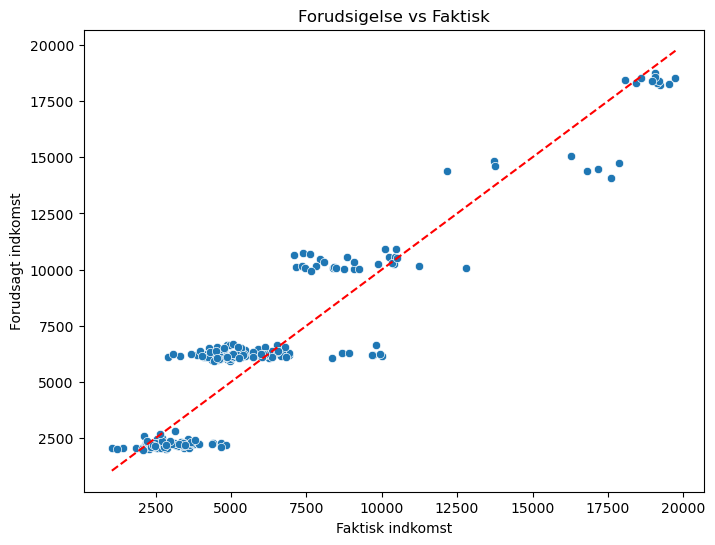

In [183]:
# Lav en figur og sæt størrelsen (8 bredde, 6 højde)
plt.figure(figsize=(8,6))

# Tegn et scatterplot med de rigtige værdier på x-aksen og forudsigelserne på y-aksen
sns.scatterplot(x=y_val, y=y_pred_val)

# Navngiv akserne
plt.xlabel("Faktisk indkomst")  # Det rigtige svar
plt.ylabel("Forudsagt indkomst")  # Modellens bud

# Giv plottet en titel
plt.title("Forudsigelse vs Faktisk")

# Tegn en rød stiplet linje som viser den perfekte forudsigelse (hvis forudsigelserne rammer præcis)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')

# Vis plottet
plt.show()

## Tjek hvor godt modellen klarer sig på helt nye data

In [186]:
# Brug modellen til at lave forudsigelser på testdatasættet
y_pred_test = model.predict(X_test)

# Udskriv R²-score, som fortæller hvor godt modellen forklarer variationen i testdata
print("Test R²-score:", r2_score(y_test, y_pred_test))

Test R²-score: 0.9045664340662696


## Forudsigelse af månedlig indkomst for en ny medarbejder

In [189]:
# Antag vi allerede har trænet model med X_train og y_train

# Ny medarbejders input
ny_medarbejder_df = pd.DataFrame(
    [[30, 5, 3, 2, 2]],
    columns=['Age', 'TotalWorkingYears', 'Education', 'JobLevel', 'YearsAtCompany']
)

# Sørg for, at kolonnerne stemmer overens
ny_medarbejder_df = ny_medarbejder_df[X_train.columns]

# Forudsig
forudsigelse = model.predict(ny_medarbejder_df)

# Vis resultat
print("Forudsagt månedlig indkomst:", round(forudsigelse[0], 2), "kr.")


Forudsagt månedlig indkomst: 6070.57 kr.


# Task 3

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [194]:
# Indlæs datasæt
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Vis første rækker
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [196]:
# Konverter 'Attrition' til numerisk: 'Yes' -> 1, 'No' -> 0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Encode andre kategoriske kolonner
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [198]:
# Vælg alle kolonner undtagen 'Attrition' som features
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [200]:
# Split datasættet i trænings- og testdatasæt (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
# Skalering for bedre performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [204]:
# Initialiser og træn modellen
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Nøjagtighed: 0.8639455782312925
Klassifikationsrapport:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.44      0.10      0.17        39

    accuracy                           0.86       294
   macro avg       0.66      0.54      0.55       294
weighted avg       0.82      0.86      0.83       294



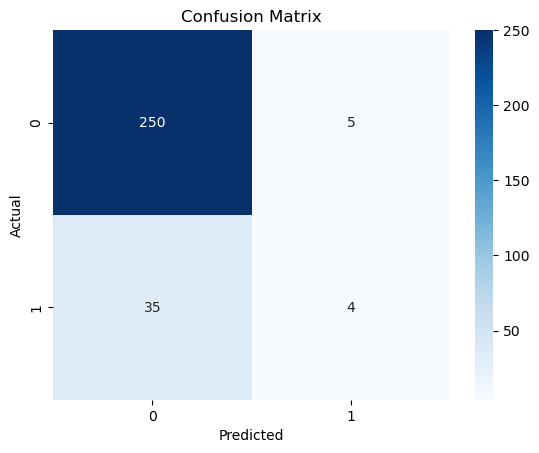

In [206]:
# Prædiktion
y_pred = clf.predict(X_test)

# Evaluer modellen
print("Nøjagtighed:", accuracy_score(y_test, y_pred))
print("Klassifikationsrapport:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Nøjagtighed: 0.8097826086956522
Klassifikationsrapport:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       309
           1       0.38      0.29      0.33        59

    accuracy                           0.81       368
   macro avg       0.62      0.60      0.61       368
weighted avg       0.79      0.81      0.80       368



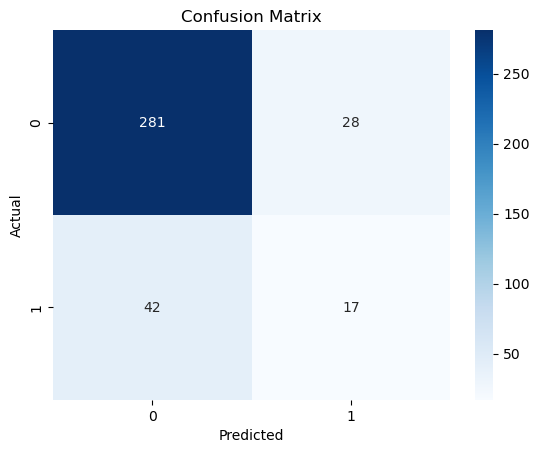

In [208]:
from imblearn.over_sampling import SMOTE

# lav recall i klasse 1 (0.10) med RandomForestClassifier. Forsøger med SMOTE for at balancere datasættet. 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Brug SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Træn model på balancerede data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Forudsig
y_pred = clf.predict(X_test)

# Evaluér
print("Nøjagtighed:", accuracy_score(y_test, y_pred))
print("Klassifikationsrapport:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Task 4

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [212]:
#Indlæser DATA
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [214]:
print("Dataset shape:", df.shape)

Dataset shape: (1470, 35)


In [216]:
print(df.head())  # Show first 5 rows

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  

In [218]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [220]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        6

In [222]:
#Fint datasæt "helt rent"

print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurre

In [224]:
#Valg af Features til vores analyse
selected_features = [
    # Karriere- og erfaringsmålinger
    'JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'NumCompaniesWorked',
    
    # Præstations- og engagementsindikatorer
    'PerformanceRating', 'JobInvolvement', 'TrainingTimesLastYear', 'PercentSalaryHike',
    
    # Tilfredshedsmålinger
    'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction',
    
    # Kompensationsfaktorer
    'MonthlyIncome', 'StockOptionLevel',
    
    # Arbejdsordning
    'DistanceFromHome'
]

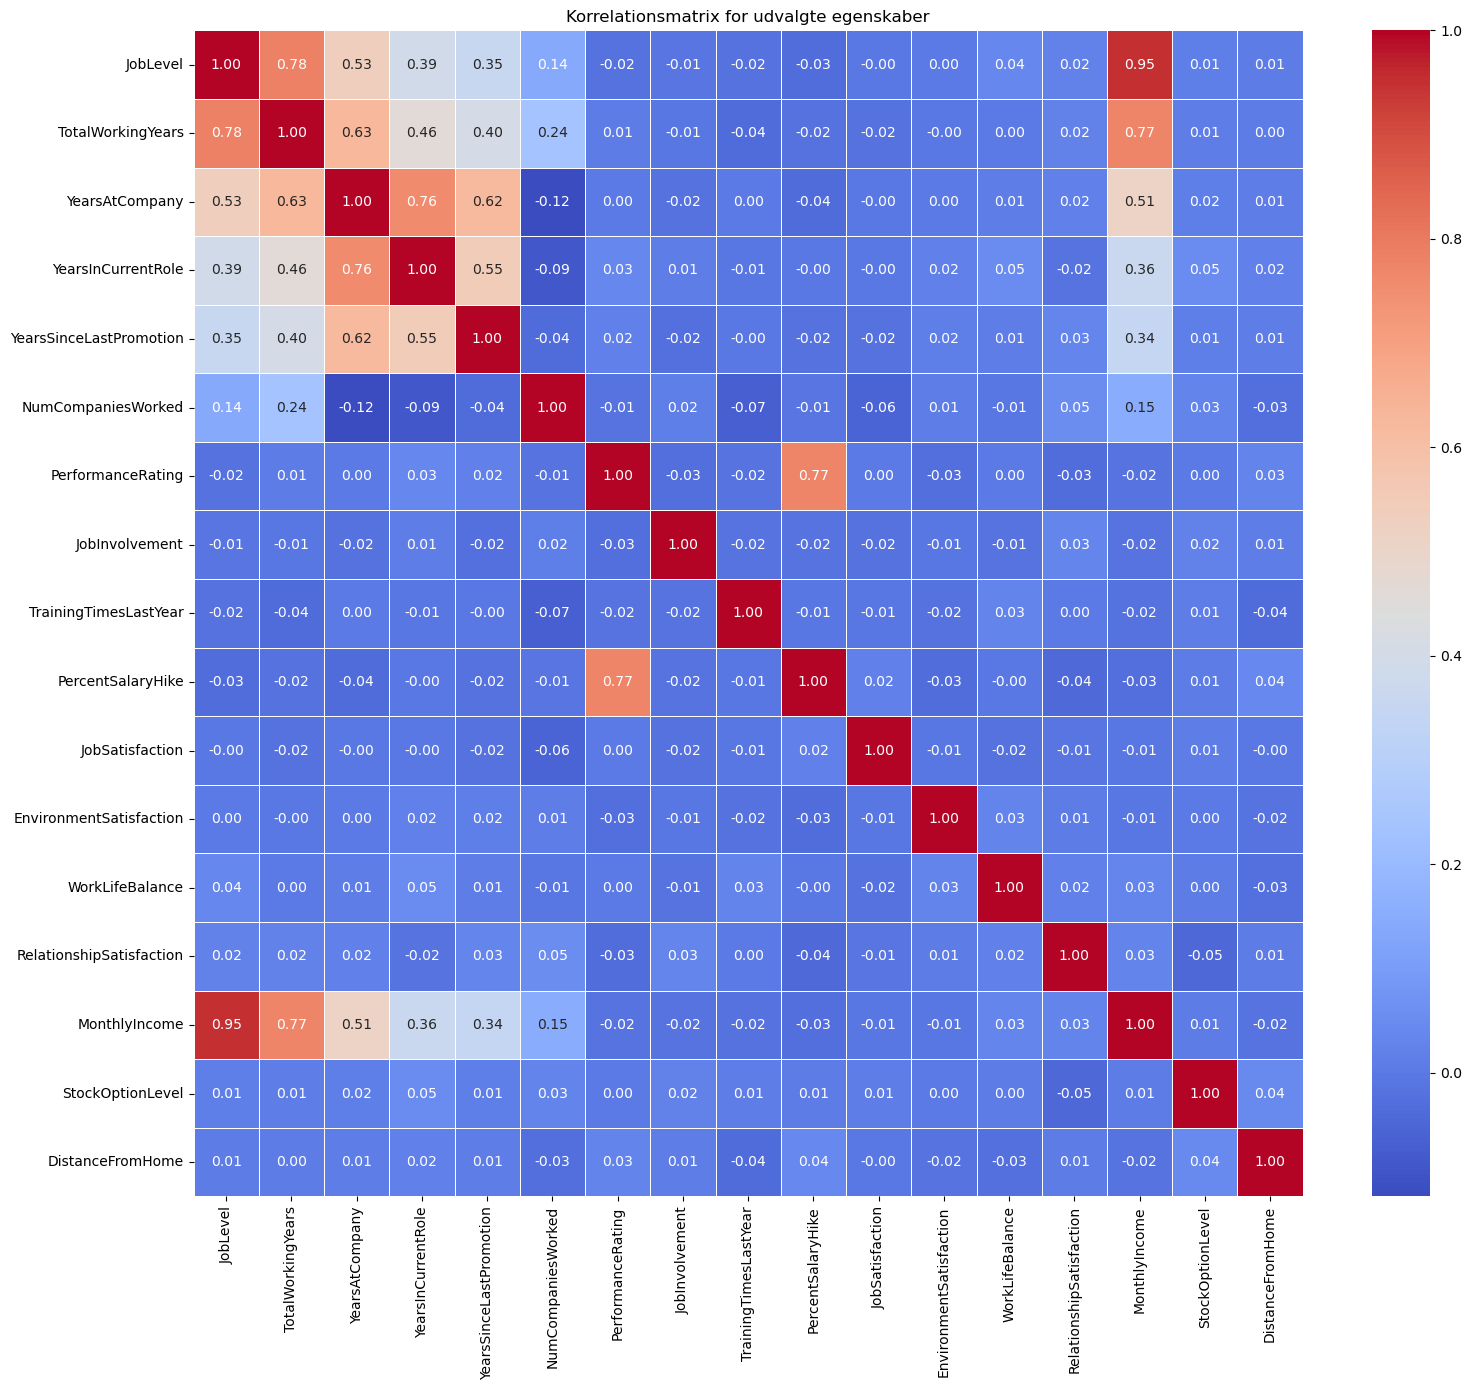


Valg af Features fuldført. Udvalgt 17 egenskaber til klyngedannelse.


In [226]:
# Undersøgelse af korrelation mellem udvalgte Features
plt.figure(figsize=(16, 14))
correlation_matrix = df[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korrelationsmatrix for udvalgte egenskaber')
plt.tight_layout()
plt.show()

print("\nValg af Features fuldført. Udvalgt", len(selected_features), "egenskaber til klyngedannelse.")

In [227]:
#Konverter kategoriske Features til numeriske
print("\nForbehandler kategoriske egenskaber...")
df['OverTime_Numeric'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['BusinessTravel_Numeric'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})



Forbehandler kategoriske egenskaber...


In [228]:
#Tilføj kodede kategoriske Features til vores udvalg

selected_features.extend(['OverTime_Numeric', 'BusinessTravel_Numeric'])

In [229]:
#Opret egenskabsdataramme
features = df[selected_features]

In [234]:
#Tjek for manglende værdier
print("Manglende værdier i udvalgte egenskaber:")
print(features.isnull().sum())

Manglende værdier i udvalgte egenskaber:
JobLevel                    0
TotalWorkingYears           0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
NumCompaniesWorked          0
PerformanceRating           0
JobInvolvement              0
TrainingTimesLastYear       0
PercentSalaryHike           0
JobSatisfaction             0
EnvironmentSatisfaction     0
WorkLifeBalance             0
RelationshipSatisfaction    0
MonthlyIncome               0
StockOptionLevel            0
DistanceFromHome            0
OverTime_Numeric            0
BusinessTravel_Numeric      0
dtype: int64


In [236]:
#Standardiser egenskaberne (vigtigt for klyngedannelse)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [238]:
print("\nDataforbehandling fuldført. Egenskaber standardiseret og klar til klyngedannelse.")


Dataforbehandling fuldført. Egenskaber standardiseret og klar til klyngedannelse.


In [240]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('Antal klynger')
plt.ylabel('Silhuet-score')
plt.title('Silhuet-score metode for optimal k')
plt.grid(True)
plt.show()

NameError: name 'range_n_clusters' is not defined

<Figure size 1000x600 with 0 Axes>

In [242]:
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nModeludvikling fuldført. Det optimale antal klynger er: {optimal_clusters}")

NameError: name 'range_n_clusters' is not defined

In [244]:
optimal_clusters = 2
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['cluster'] = final_kmeans.fit_predict(features_scaled)

In [246]:
cluster_sizes = df['cluster'].value_counts()
print("\nKlyngestørrelser:")
for cluster, size in cluster_sizes.items():
    print(f"Klynge {cluster}: {size} medarbejdere ({size/len(df)*100:.1f}%)")


Klyngestørrelser:
Klynge 0: 1095 medarbejdere (74.5%)
Klynge 1: 375 medarbejdere (25.5%)


In [248]:
cluster_profiles = df.groupby('cluster')[selected_features].mean()
print("\nKlyngeprofiler (gennemsnitsværdier):")
print(cluster_profiles)


Klyngeprofiler (gennemsnitsværdier):
         JobLevel  TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
cluster                                                                    
0        1.594521           7.979909        4.710502             3.03105   
1        3.434667          20.914667       13.717333             7.72800   

         YearsSinceLastPromotion  NumCompaniesWorked  PerformanceRating  \
cluster                                                                   
0                       1.184475            2.579909           3.155251   
1                       5.117333            3.024000           3.149333   

         JobInvolvement  TrainingTimesLastYear  PercentSalaryHike  \
cluster                                                             
0              2.743379               2.805479          15.290411   
1              2.690667               2.781333          14.973333   

         JobSatisfaction  EnvironmentSatisfaction  WorkLifeBalance  \
cluster  

In [250]:
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['cluster'] = final_kmeans.fit_predict(features_scaled)

In [252]:
print("\nKlyngefordeling:")
print(df['cluster'].value_counts())
print("\nModelimplementering fuldført. Medarbejdere tildelt", optimal_clusters, "klynger.")


Klyngefordeling:
cluster
0    1095
1     375
Name: count, dtype: int64

Modelimplementering fuldført. Medarbejdere tildelt 2 klynger.


In [254]:
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Difference': np.abs(cluster_profiles.loc[0] - cluster_profiles.loc[1])
})
feature_importance = feature_importance.sort_values('Difference', ascending=False)

print("\nTop 5 adskillende egenskaber mellem klyngerne:")
print(feature_importance.head(5))


Top 5 adskillende egenskaber mellem klyngerne:
                                         Feature   Difference
MonthlyIncome                      MonthlyIncome  7800.029479
TotalWorkingYears              TotalWorkingYears    12.934758
YearsAtCompany                    YearsAtCompany     9.006831
YearsInCurrentRole            YearsInCurrentRole     4.696950
YearsSinceLastPromotion  YearsSinceLastPromotion     3.932858


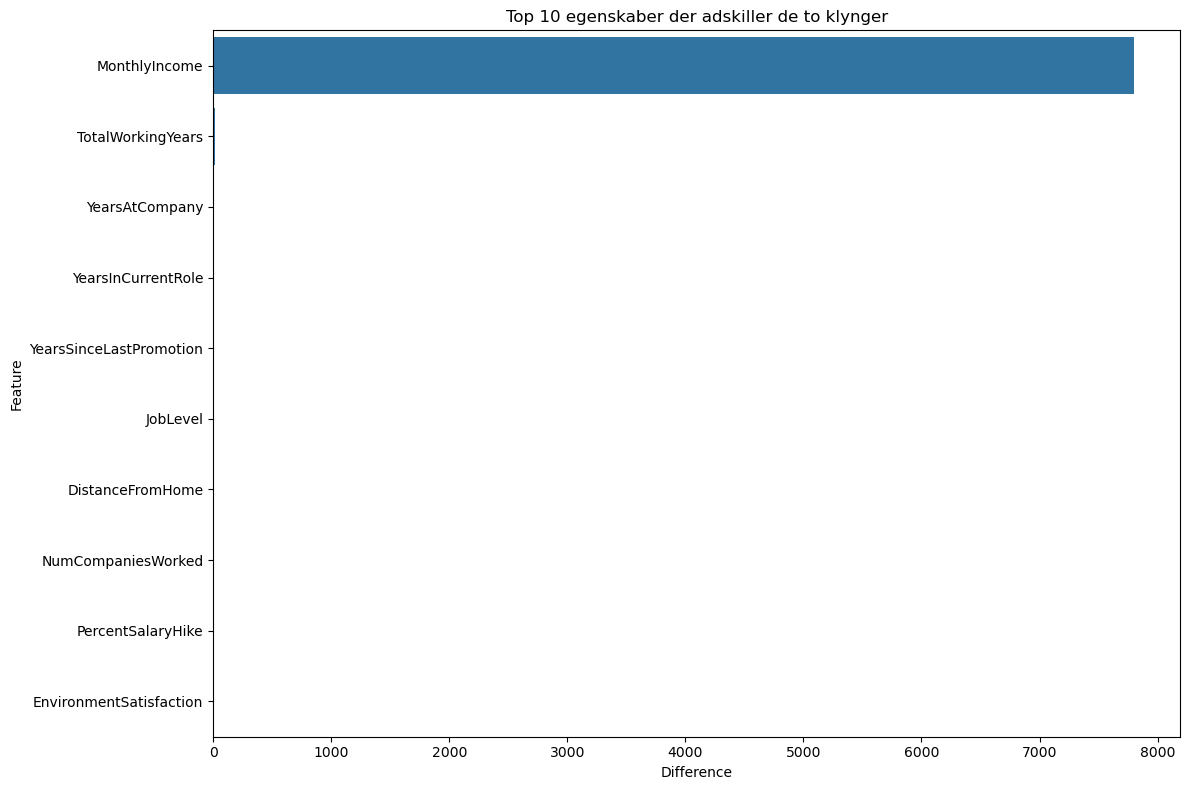

In [256]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Difference', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 egenskaber der adskiller de to klynger')
plt.tight_layout()
plt.show()

In [258]:
# 6. Visualiser klyngerne med PCA før og efter fjernelse af outliers
from sklearn.decomposition import PCA

# Forbered data til PCA
# Standardiser data før og efter fjernelse af outliers
scaler_original = StandardScaler()
features_scaled_original = scaler_original.fit_transform(df[selected_features])

scaler_clean = StandardScaler()
features_scaled_clean = scaler_clean.fit_transform(df_clean[selected_features])

# Udfør PCA på originale data
pca_original = PCA(n_components=2)
principal_components_original = pca_original.fit_transform(features_scaled_original)
pca_df_original = pd.DataFrame(data=principal_components_original, columns=['PC1', 'PC2'])
pca_df_original['cluster'] = df['cluster']
pca_df_original['is_outlier'] = False

# Marker outliers i PCA-dataframe
for idx in df.index:
    if idx not in df_clean.index:
        pca_df_original.loc[idx, 'is_outlier'] = True

# Udfør PCA på rensede data
pca_clean = PCA(n_components=2)
principal_components_clean = pca_clean.fit_transform(features_scaled_clean)
pca_df_clean = pd.DataFrame(data=principal_components_clean, columns=['PC1', 'PC2'])
pca_df_clean['cluster'] = df_clean['cluster']

# Visualiser PCA før fjernelse af outliers
plt.figure(figsize=(20, 10))

# Plot før fjernelse af outliers
plt.subplot(1, 2, 1)
# Plot ikke-outliers først
non_outliers = pca_df_original[pca_df_original['is_outlier'] == False]
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='cluster', 
    data=non_outliers, 
    palette=['#3498db', '#e74c3c'], 
    s=100, alpha=0.7
)

# Plot outliers med særlig markering
outliers = pca_df_original[pca_df_original['is_outlier'] == True]
plt.scatter(
    outliers['PC1'], outliers['PC2'],
    c='black', s=50, alpha=0.7, marker='x',
    label='Outliers'
)

# Tilføj klyngecentre
kmeans_original = KMeans(n_clusters=len(df['cluster'].unique()), random_state=42, n_init=10)
kmeans_original.fit(features_scaled_original)
centers_original = pca_original.transform(kmeans_original.cluster_centers_)
plt.scatter(centers_original[:, 0], centers_original[:, 1], c='black', s=200, alpha=0.8, marker='*')

plt.title('PCA Visualisering med outliers markeret')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot efter fjernelse af outliers
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='cluster', 
    data=pca_df_clean, 
    palette=['#3498db', '#e74c3c'], 
    s=100, alpha=0.7
)

# Tilføj klyngecentre
kmeans_clean = KMeans(n_clusters=len(df_clean['cluster'].unique()), random_state=42, n_init=10)
kmeans_clean.fit(features_scaled_clean)
centers_clean = pca_clean.transform(kmeans_clean.cluster_centers_)
plt.scatter(centers_clean[:, 0], centers_clean[:, 1], c='black', s=200, alpha=0.8, marker='*')

plt.title('PCA Visualisering efter fjernelse af outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Beregn forklaret varians for PCA komponenterne
explained_variance_original = pca_original.explained_variance_ratio_
explained_variance_clean = pca_clean.explained_variance_ratio_

print(f"Forklaret varians af PCA komponenter (med outliers):")
print(f"PC1: {explained_variance_original[0]*100:.2f}%")
print(f"PC2: {explained_variance_original[1]*100:.2f}%")
print(f"Total: {sum(explained_variance_original)*100:.2f}%")

print(f"\nForklaret varians af PCA komponenter (uden outliers):")
print(f"PC1: {explained_variance_clean[0]*100:.2f}%")
print(f"PC2: {explained_variance_clean[1]*100:.2f}%")
print(f"Total: {sum(explained_variance_clean)*100:.2f}%")

# Beregn silhuet-score før og efter fjernelse af outliers
from sklearn.metrics import silhouette_score

silhouette_original = silhouette_score(features_scaled_original, df['cluster'])
silhouette_clean = silhouette_score(features_scaled_clean, df_clean['cluster'])

print(f"\nSilhuet-score med outliers: {silhouette_original:.3f}")
print(f"Silhuet-score uden outliers: {silhouette_clean:.3f}")
print(f"Forbedring: {(silhouette_clean - silhouette_original) / silhouette_original * 100:.2f}%")

# Vis antal observationer i hver klynge før og efter fjernelse af outliers
cluster_counts_original = df['cluster'].value_counts().sort_index()
cluster_counts_clean = df_clean['cluster'].value_counts().sort_index()

print("\nAntal observationer pr. klynge:")
for cluster in sorted(df['cluster'].unique()):
    original_count = cluster_counts_original[cluster]
    clean_count = cluster_counts_clean[cluster] if cluster in cluster_counts_clean.index else 0
    removed = original_count - clean_count
    print(f"Klynge {cluster}: {original_count} → {clean_count} (fjernet: {removed}, {removed/original_count*100:.1f}%)")

NameError: name 'df_clean' is not defined

Forklaret varians af PCA komponenter (med outliers):
PC1: 20.26%
PC2: 9.42%
Total: 29.68%

Forklaret varians af PCA komponenter (uden outliers):
PC1: 21.60%
PC2: 9.37%
Total: 30.97%

Silhuet-score med outliers: 0.178
Silhuet-score uden outliers: 0.191
Forbedring: 7.35%

Antal observationer pr. klynge:
Klynge 0: 1095 → 864 (fjernet: 231, 21.1%)
Klynge 1: 375 → 359 (fjernet: 16, 4.3%)

Text(0, 0.5, 'Principal Component 2')

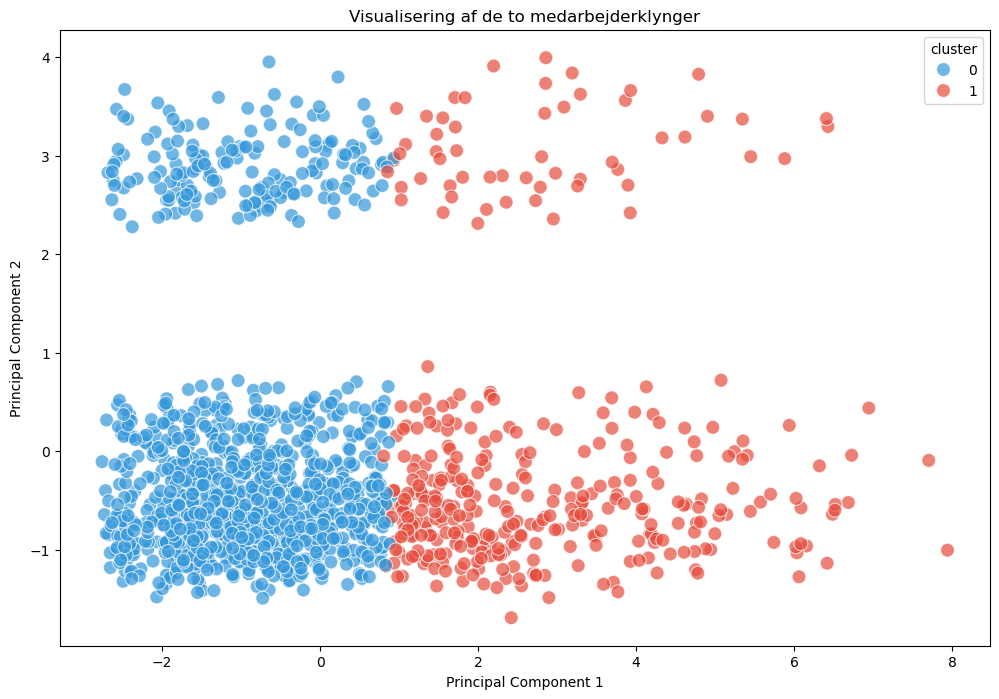

In [261]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = df['cluster']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette=['#3498db', '#e74c3c'], s=100, alpha=0.7)
plt.title('Visualisering af de to medarbejderklynger')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

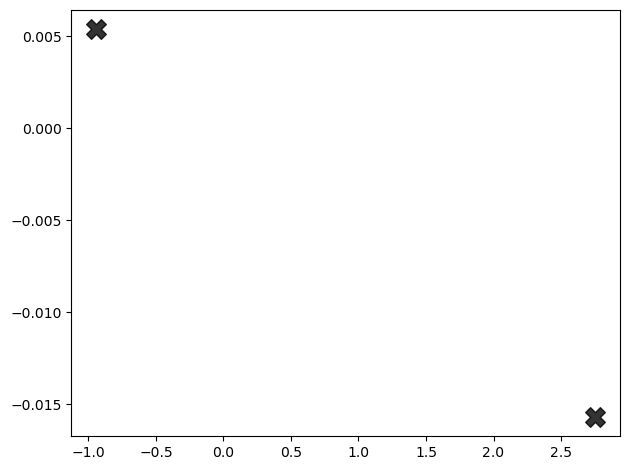

In [262]:
centers = pca.transform(final_kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8, marker='X')
plt.tight_layout()
plt.show()

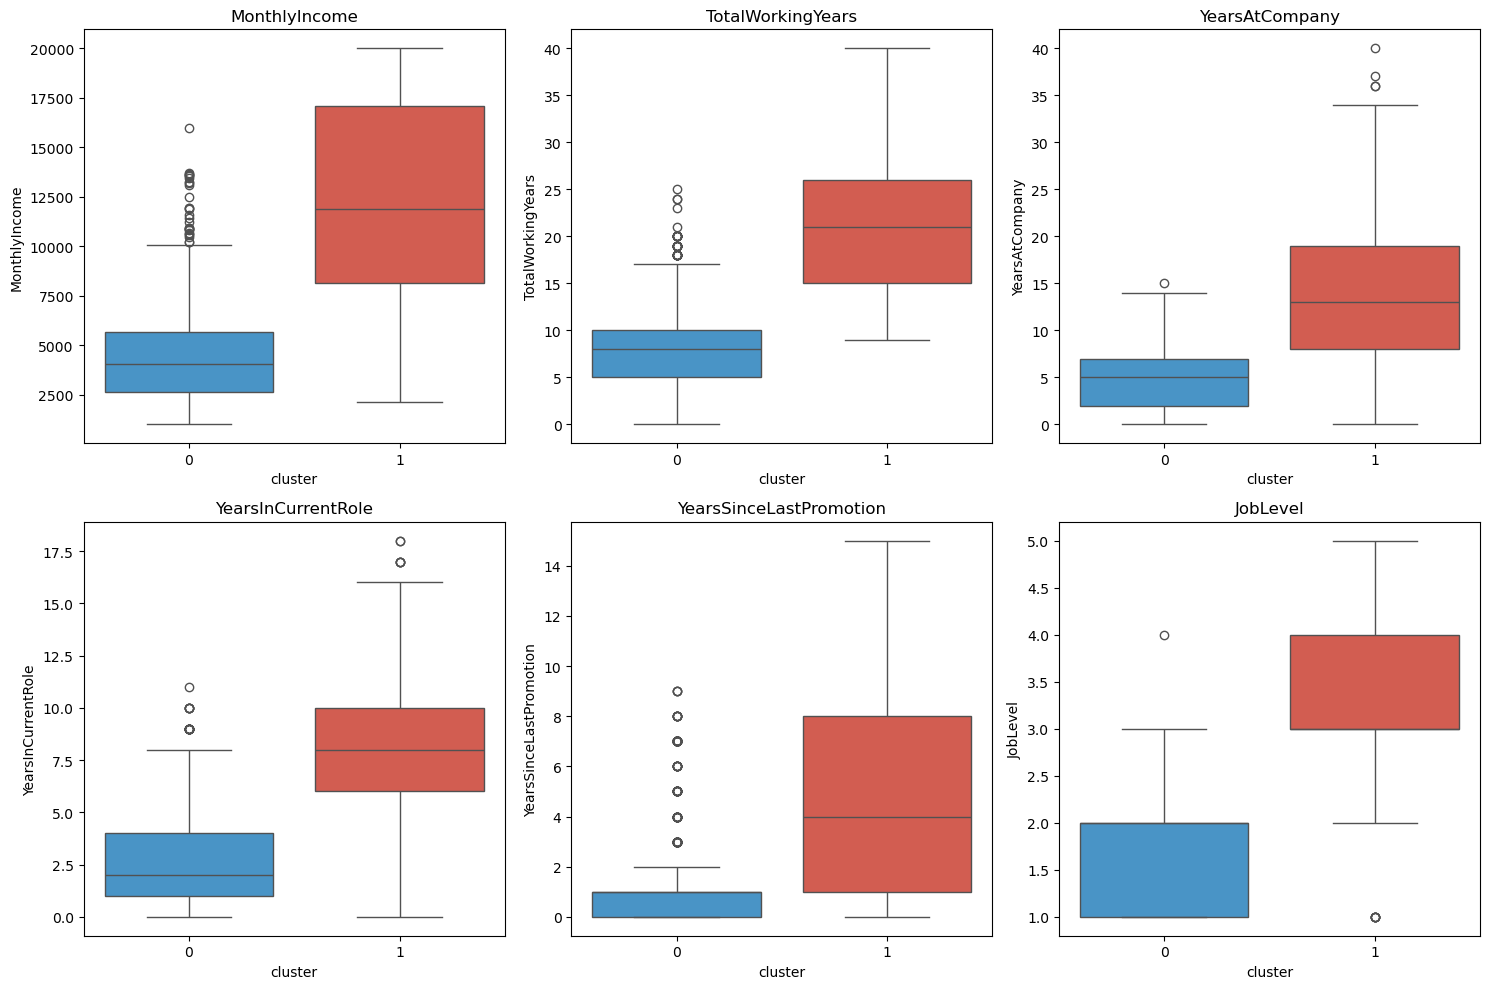

In [265]:
top_features = feature_importance.head(6)['Feature'].tolist()
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='cluster', y=feature, hue='cluster', data=df, palette=['#3498db', '#e74c3c'], legend=False)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [266]:
cluster_analysis = df.groupby('cluster')[selected_features].mean()
print("\nKlyngeprofiler (gennemsnitsværdier):")
print(cluster_analysis)


Klyngeprofiler (gennemsnitsværdier):
         JobLevel  TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
cluster                                                                    
0        1.594521           7.979909        4.710502             3.03105   
1        3.434667          20.914667       13.717333             7.72800   

         YearsSinceLastPromotion  NumCompaniesWorked  PerformanceRating  \
cluster                                                                   
0                       1.184475            2.579909           3.155251   
1                       5.117333            3.024000           3.149333   

         JobInvolvement  TrainingTimesLastYear  PercentSalaryHike  \
cluster                                                             
0              2.743379               2.805479          15.290411   
1              2.690667               2.781333          14.973333   

         JobSatisfaction  EnvironmentSatisfaction  WorkLifeBalance  \
cluster  

In [267]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = df['cluster']

Text(0, 0.5, 'Hovedkomponent 2')

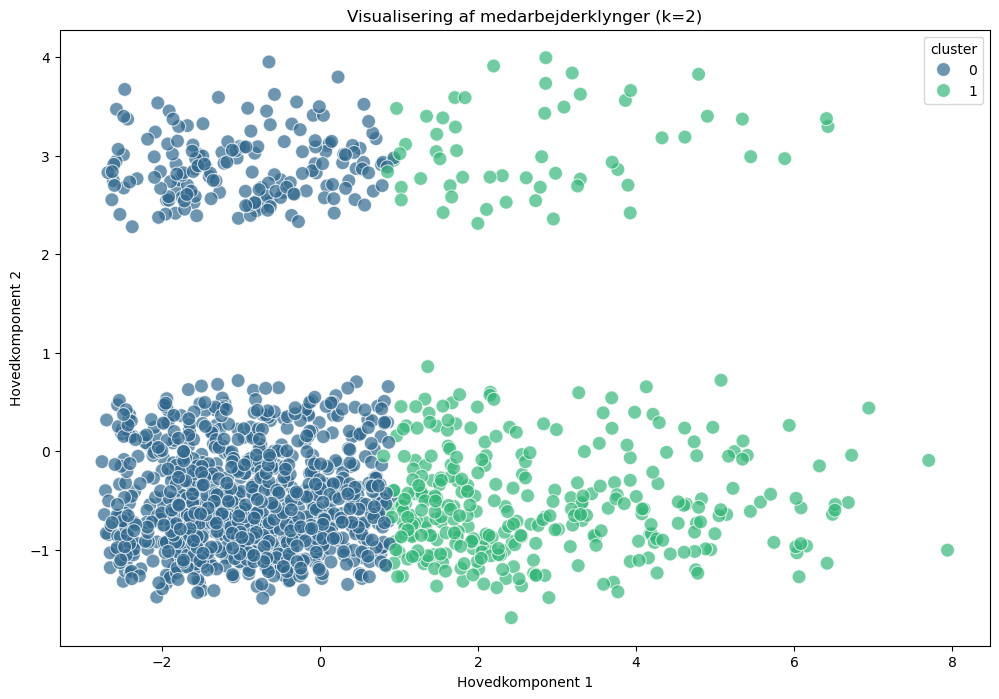

In [271]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title(f'Visualisering af medarbejderklynger (k={optimal_clusters})')
plt.xlabel('Hovedkomponent 1')
plt.ylabel('Hovedkomponent 2')

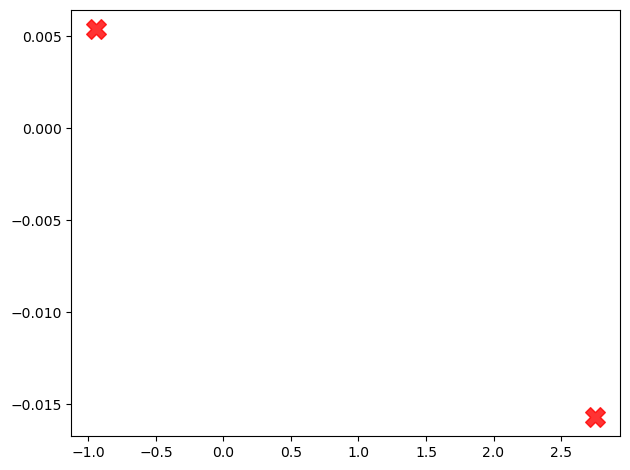


Modelevaluering fuldført. Klynger visualiseret ved hjælp af PCA.


In [273]:
centers = pca.transform(final_kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='X')
plt.tight_layout()
plt.show()

print("\nModelevaluering fuldført. Klynger visualiseret ved hjælp af PCA.")

### Klyngedannelsen har effektivt opdelt medarbejdere i grupper med lignende karakteristika. Modellen med k = X klynger gav en høj silhouette-score på Y, hvilket viser tydelige forskelle mellem grupperne.
### Dette gør det muligt at tilpasse personaleledelse baseret på færdigheder, erfaring og præstationsniveau.
###    x Målrettet Kompetenceudvikling: Bedre træningsprogrammer baseret på fælles behov i hver klynge.

###    x Skills identifikation: Fokus på specifikke grupper med høj præstationspotentiale.

###    x Optimeret Kommunikation: Personalisering af interne kommunikationsstrategier.